<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/210_cont_rv_distr.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(cont-rv-distr-notebook)=
# Distribuzioni di v.c. continue 

Dopo avere introdotto con una simulazione il concetto di funzione di densità nel capitolo {ref}`density-function-notebook`, prendiamo ora in esame alcune delle densità di probabilità più note. Iniziamo con la distribuzione continua uniforme.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as sc
from scipy.integrate import quad
import seaborn as sns
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")

## Distribuzione uniforme
La distribuzione uniforme è la più sempilce funzione di densità di probabilità. Consideriamo nuovamente l'esperimento con lo spinner che abbiamo introdotto nel capitolo {ref}`density-function-notebook`. Simuliamo 20 valori che potrebbero essere ottenuti facendo ruotare lo spinner e li rappresentiamo con un istogramma.

In [3]:
y = rng.uniform(low=0, high=360, size=20)
y

array([278.62417748, 157.99623831, 309.09525117, 251.05249046,
        33.90384524, 351.22404659, 274.01029272, 282.9831499 ,
        46.12090776, 162.13893764, 133.48728872, 333.63539599,
       231.79144323, 296.19418078, 159.62911158,  81.80593984,
       199.65052333,  22.9742122 , 297.94722192, 227.39918368])

Text(0, 0.5, 'Frequenza relativa')

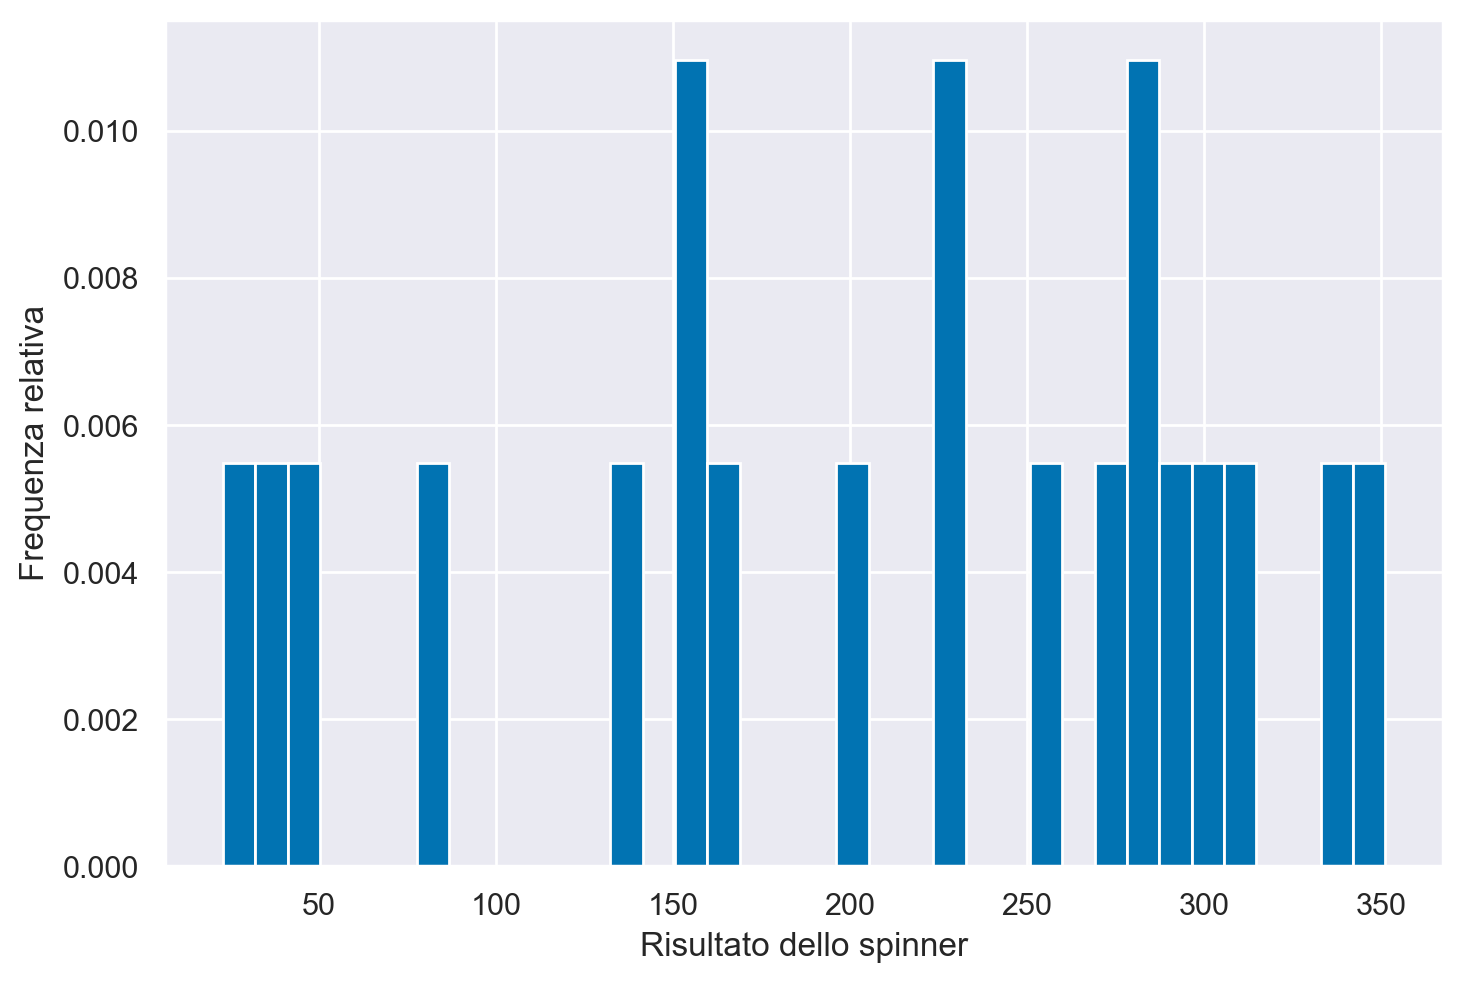

In [4]:
count, bins, ignored = plt.hist(y, bins=36, density=True)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa")


Sebbene possiamo pensare che sia ugualmente probabile che si verifichi qualsiasi risultato tra 0 e 360, l'istogramma non sembra suggerire questo. Ma lo spinner è stato fatto ruotare solo 20 volte. Proviamo con 100,000 ripetizioni. 

Text(0, 0.5, 'Frequenza relativa')

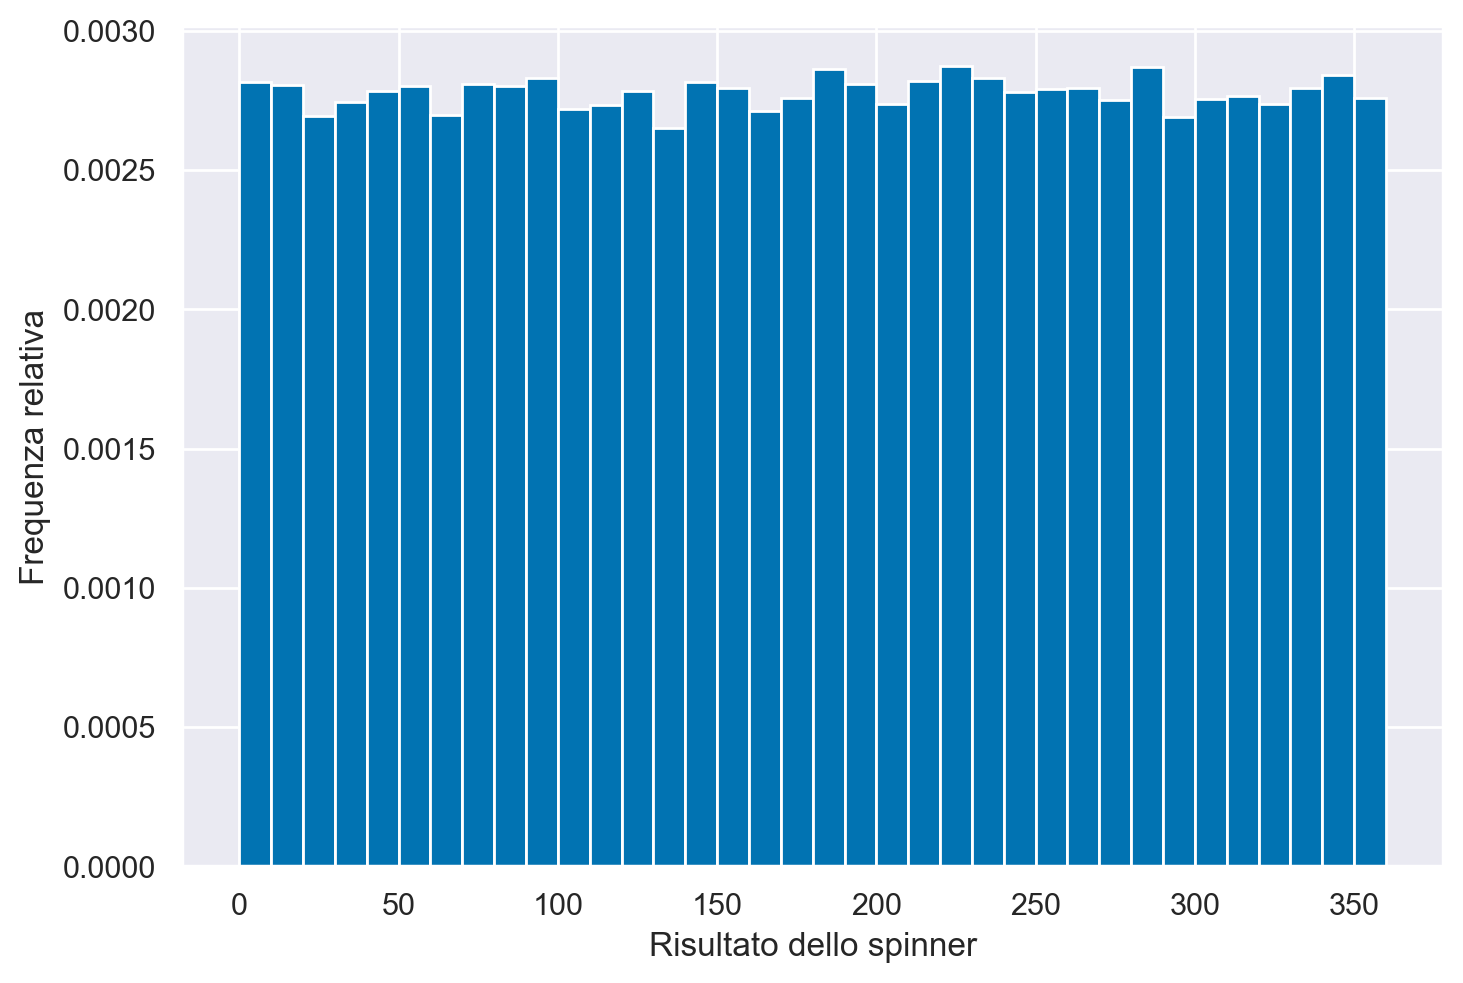

In [5]:
count, bins, ignored = plt.hist(360 * rng.uniform(size=100000), bins=36, density=True)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa")


In questo caso, anche se c'è una variazione nelle altezze delle barre (con $\Delta$ = 10), la forma generale dell'istogramma sembra essere piuttosto piatta, ovvero uniforme, nell'intero intervallo dei valori possibili di $X$, ovvero $0 <= X <= 360$. Se potessimo ottenere un numero enorme di risultati dello spinner, il profilo dell'istogramma assumerebbe la forma della *funzione di densità uniforme* mostratra nella figura seguente.

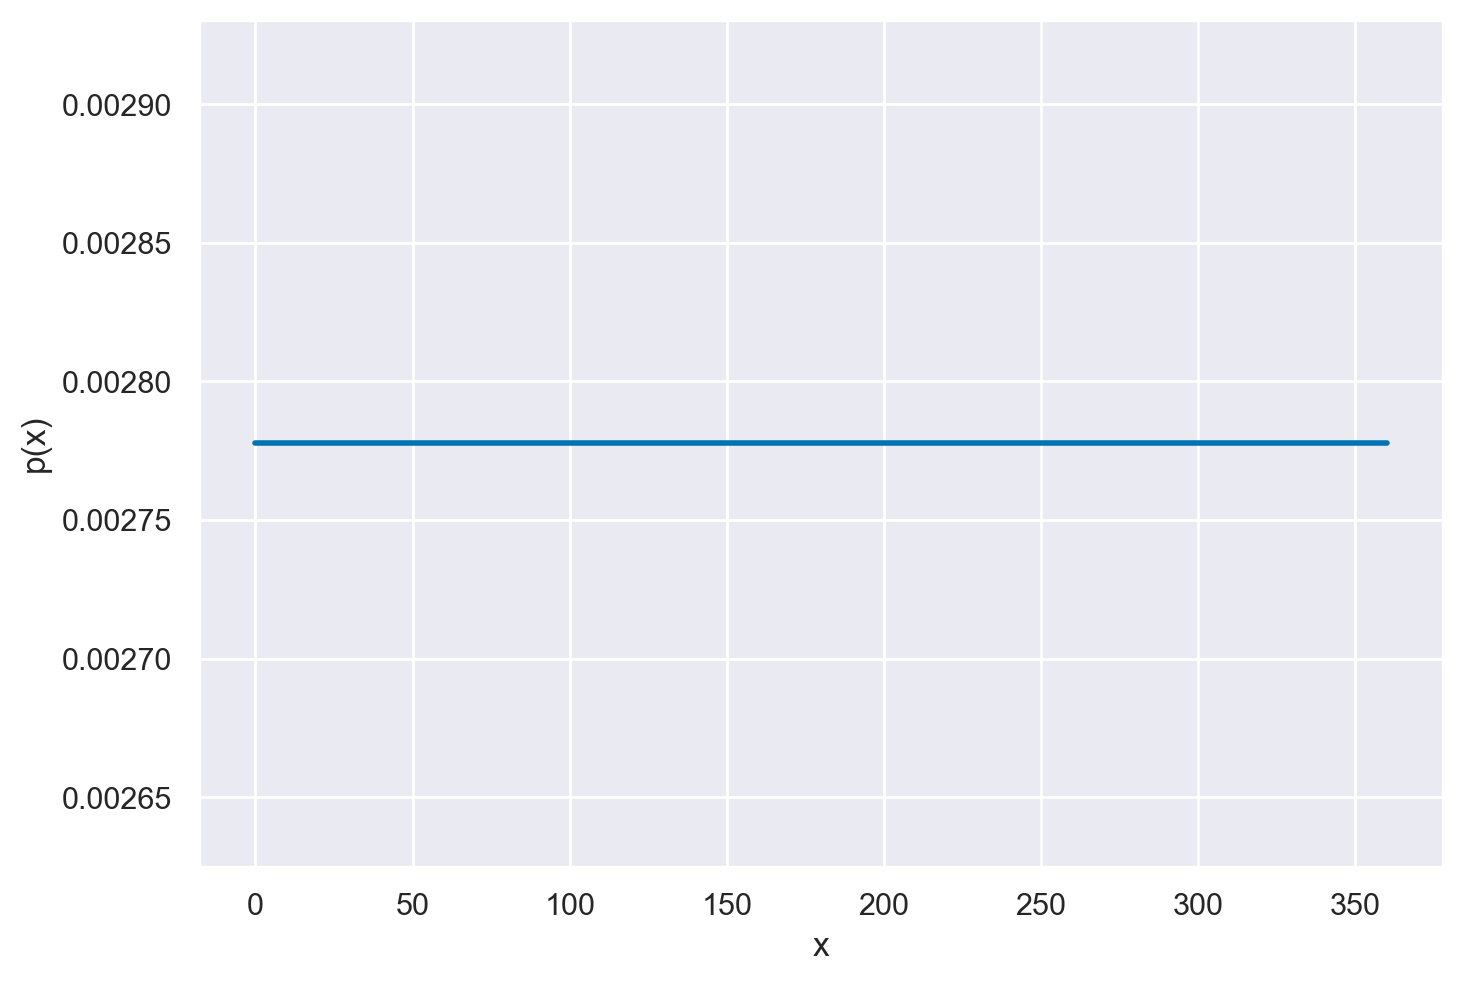

In [9]:
x = np.linspace(0, 360, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 360), lw=2, label="uniform pdf")
plt.xlabel("x")
_ = plt.ylabel("p(x)")


Quando la variabile casuale $X$ è continua, come nel caso del risultato della rotazione dello spinner, allora per rappresentare le probabilità usiamo una curva chiamata funzione di densità di probabilità. Poiché la scala dello spinner va da 0 a 360, sappiamo che tutti i risultati possibili devono cadere in questo intervallo, quindi la probabilità che $X$ assuma un valore nell'intervallo [0, 360] è 1.0. Questa probabilità è rappresentata dall'area totale sotto la funzione di densità della figura precedente tra 0 e 360. Poiché l'area di questo rettangolo è data dall'altezza per la base e la base è uguale a 360, l'altezza di questa curva di densità deve essere 1/360 = 0.00278. L'ordinata della funzione di densità (qui 0.00278 nell'intervallo [0, 360] e 0 altrove) è chiamata *densità*.

Le probabilità corrispondono alle aree sottese alla curva di densità nell'intervallo di valori $X$ specificato. Per esempio, nell'esperimento dello spinner possiamo chiederci quale sia la probabilità di ottenere un numero compreso tra 150 e 250, ovvero $P(150 < X < 250)$. Per trovare la risposta dobbiamo calcolare l'area di un rettangolo. La base è 250 - 150 = 100.  L'altezza è 0.00278. Dunque, la probabilità è

In [63]:
100*1/360

0.2777777777777778

Per svolgere questo calcolo i software utilizzano la funzione di ripartizione, $P(X < x)$. Per trovare l'area in un intervallo è necessario sottrarre due aree. Nel caso presente abbiamo $P(x < 250) - P(x < 150)$, ovvero:

In [64]:
stats.uniform.cdf(250, 0, 360) - stats.uniform.cdf(150, 0, 360)

0.27777777777777773

La probabilità cercata è rappresentata dal rettangolo indicato nella figura seguente.

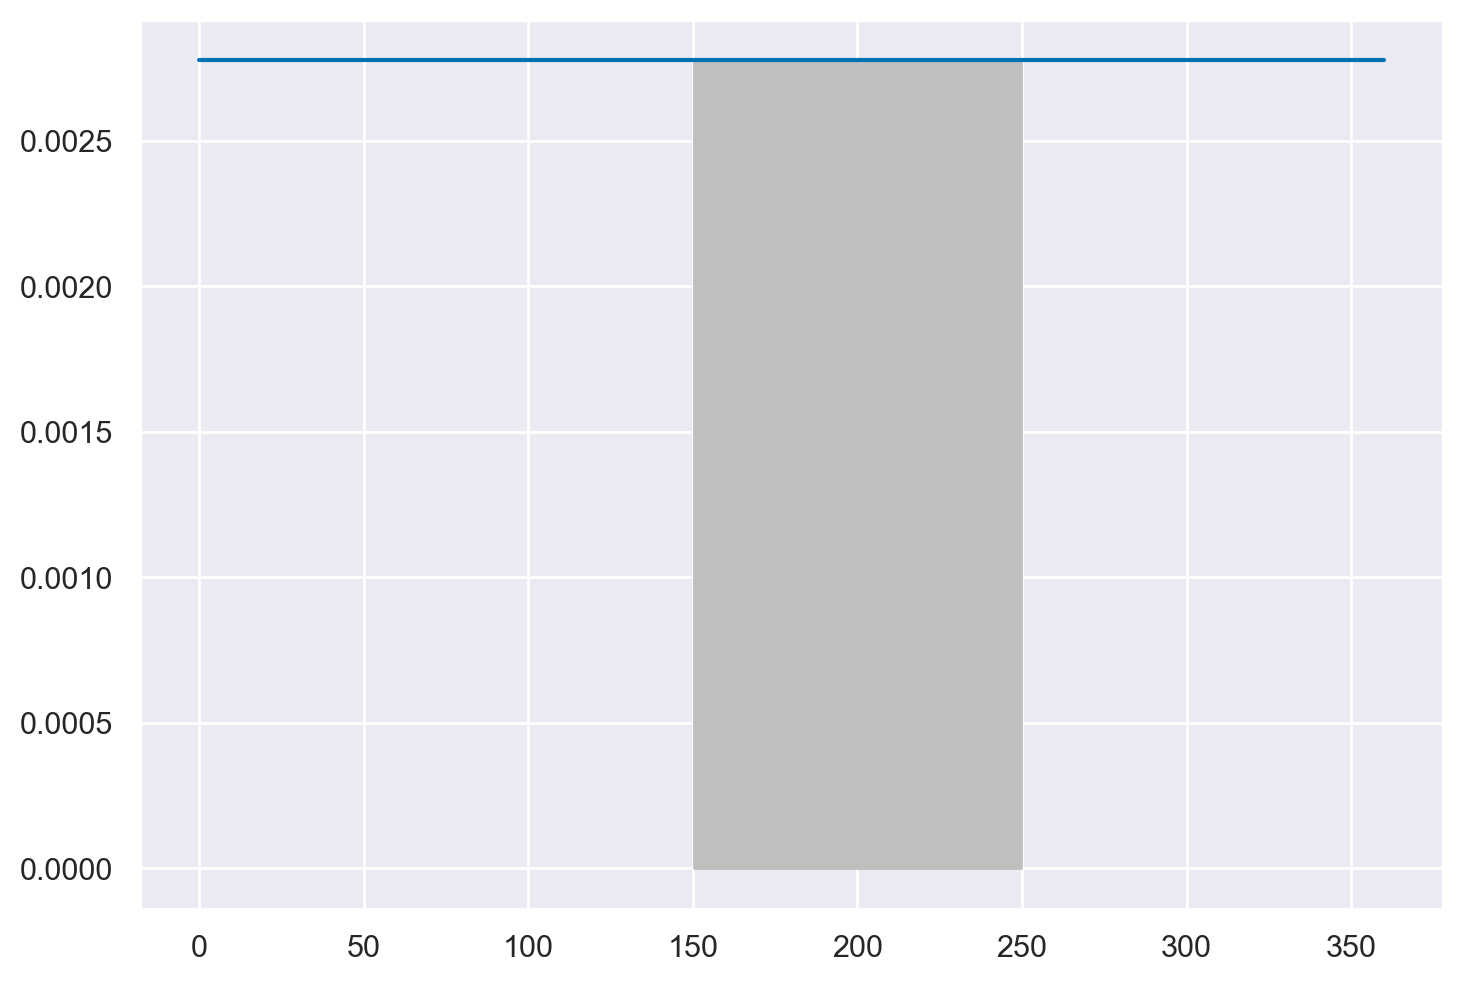

In [8]:
x = np.linspace(0, 360, 1000)
fx = stats.uniform.pdf(x, 0, 360)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=(x >= 150) & (x <= 250), color="0.75")


In maniera più formale possiamo dire che la distribuzione continua uniforme è una distribuzione di probabilità continua che assegna lo stesso grado di fiducia a tutti i possibili valori di una variabile definita in un certo intervallo $S=[a,b]\subset {\mathbb  {R}}$. La distribuzione continua uniforme viene indicata con ${\mathcal  {U}}(a,b)={\mathcal  {U}}([a,b])$. Come intervallo $[a,b]$ viene spesso preso l'intervallo unitario $I=[0,1]$.

La densità di probabilità di una variabile casuale continua uniforme ${\mathcal  {U}}(a,b)$ è

$$
f(x)={\frac  {1}{b-a}} \quad \text{su}\; [a, b].
$$

Il suo valore attesto è

$$
\displaystyle E(X)={\frac {1}{2}}(b+a).
$$

La sua varianza è

$$
V(X)={\frac {1}{12}}(b-a)^{2}.
$$

In Python è possibile manipolare la distribuzione uniforme mediante la funzione `uniform` del modulo `scipy.stats`.  Di default, la funzione `scipy.stats.uniform()` è un'istanziazione di ${\mathcal{U}}(0,1)$. Se utilizziamo la funzione `pdf()` (*probability density function*) otteniamo l'ordinata della funzione di densità ${\mathcal{U}}(0,1)$ in corrispondenza dei valori $x$ passati in input. Per esempio, esaminiamo la funzione di densità ${\mathcal{U}}(0,1)$ in corrispondenza di 0.5, 0.8 e 1.2. Per i primi due valori ci aspettiamo di ottenere 1; in corrispondenza di 1.2 ci aspettiamo di ottenere 0, poiché questo valore è al di fuori dell'intervallo $[ 0, 1]$.

In [11]:
stats.uniform.pdf([0.5, 0.8, 1.2])

array([1., 1., 0.])

Con la funzione `cdf()` (*cumulative density function*) otteniamo la funzione di ripartizione. Per esempio, per ${\mathcal{U}}(0,1)$ in corrispondenza dei punti 0.5 e 0.8 otteniamo

In [12]:
stats.uniform.cdf([0.5, 0.8])

array([0.5, 0.8])

Usando la funzione di ripartizione è possibile calcolare la probabilità che la variabile casuale continua assuma un valore nell'intervallo specificato. Per esempio, per ${\mathcal{U}}(0,1)$ troviamo $P(0.5 < x < 0.8)$ 

In [13]:
stats.uniform.cdf(0.8) - stats.uniform.cdf(0.5)

0.30000000000000004

I quantili di una funzione di densità (ovvero, il valore della variabile casuale $X$ in corrispondenza del valore della funzione di ripartizione fornito in input) si ottengono con la funzione `ppf()` (*probability point function*). Per esempio, troviamo i quantili di ordine 0.5 e 0.8 di una ${\mathcal  {U}}(0,1)$.

In [14]:
stats.uniform.ppf([0.5, 0.8])

array([0.5, 0.8])

Infine, è possibile simulare dei valori casuali della distribuzione ${\mathcal{U}}(0,1)$ usando la funzione `rng.uniform()`. Se vogliamo 5 valori da una ${\mathcal{U}}(0,1)$, scriviamo:

In [15]:
rng.uniform(size=5)

array([0.37949106, 0.27866256, 0.8162908 , 0.69669817, 0.10985629])

Verifico il valore atteso di 100,000 realizzazioni di ${\mathcal {U}}(0,1)$.

In [16]:
rng.uniform(size=100000).mean()

0.49932833719395314

Verifico la varianza di 100,000 realizzazioni di ${\mathcal  {U}}(0,1)$.

In [17]:
rng.uniform(size=100000).var()


0.0832116489056256

In [18]:
1 / 12


0.08333333333333333

## Distribuzione esponenziale
Un'altra distribuzione di densità molto semplice è la distribuzione esponenziale. La distribuzione esponenziale viene spesso utilizzata per modellare il tempo trascorso prima che un evento si verifichi (tempo di attesa). Chiamiamo $X$ il tempo di attesa. Sia $\mu = \mathbb{E}(X)$ il tempo di attesa medio. La funzione di densità esponenziale è

$$
f(x) = \lambda {\rm e}^{-\lambda x}, \quad \text{con} \; \lambda = 1/\mu,\, \lambda > 0,\, x > 0
$$ (eq-exponential-pdf)

Possiamo anche scrivere l'eq. {eq}`eq-exponential-pdf` come

$$
f(x) = \frac{1}{\mu} {\rm e}^{-x/\mu}.
$$ 

La varianza di una distribuzione esponenziale è

$$
V(X) = \frac{1}{\lambda^2}.
$$

La deviazione standard è dunque uguale alla media:

$$
\sigma_X = \frac{1}{\lambda} = \mu.
$$

Ad esempio, il tempo di attesa della pubblicazione del voto di un esame scritto segue una distribuzione esponenziale. Supponiamo che, in questo Corso di Laurea, il tempo di attesa medio per conoscere il risultato di un esame scritto sia di 4 giorni. La funzione esponenziale diventa

$$
f(x) = \frac{1}{4} \exp^{-x/4}.
$$ 

Per disegnare un grafico della funzione esponenziale possiamo usare la funzione `scipy.stats.expon()`. La densità è data da `pdf(x, loc, scale)`, laddove il parametro `loc` è 0 e `scale` è la deviazione standard.  Nel caso presente abbiamo

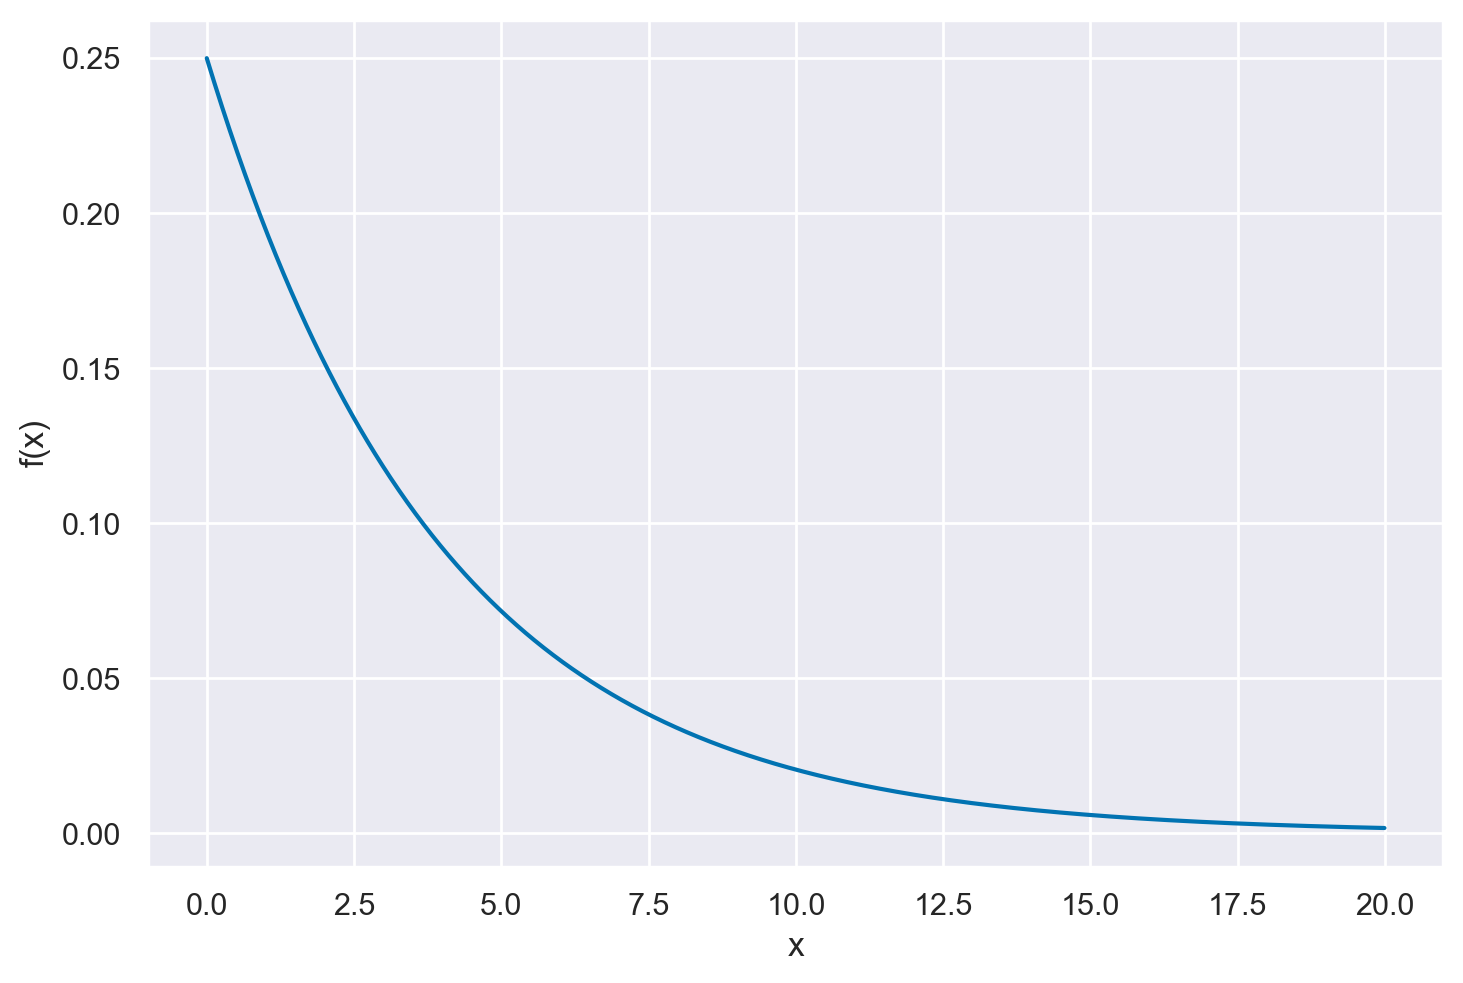

In [20]:
x = np.arange(0, 20, 0.01)

mu = 4
decay_par = 1 / mu
stdev = 1 / decay_par
pdf = stats.expon.pdf(x, loc=0, scale=stdev)
plt.plot(x, pdf)
plt.xlabel("x")
_ = plt.ylabel("f(x)")


Chiediamoci, ad esempio quale sia la probabilità di dovere aspettare non più di un giorno e mezzo per conoscere il voto. La risposta a questa domanda è data dalla funzione di ripartizione in corrispondenza di 1.5, ovvero $F(1.5) = P(X \leq 1.5)$. 

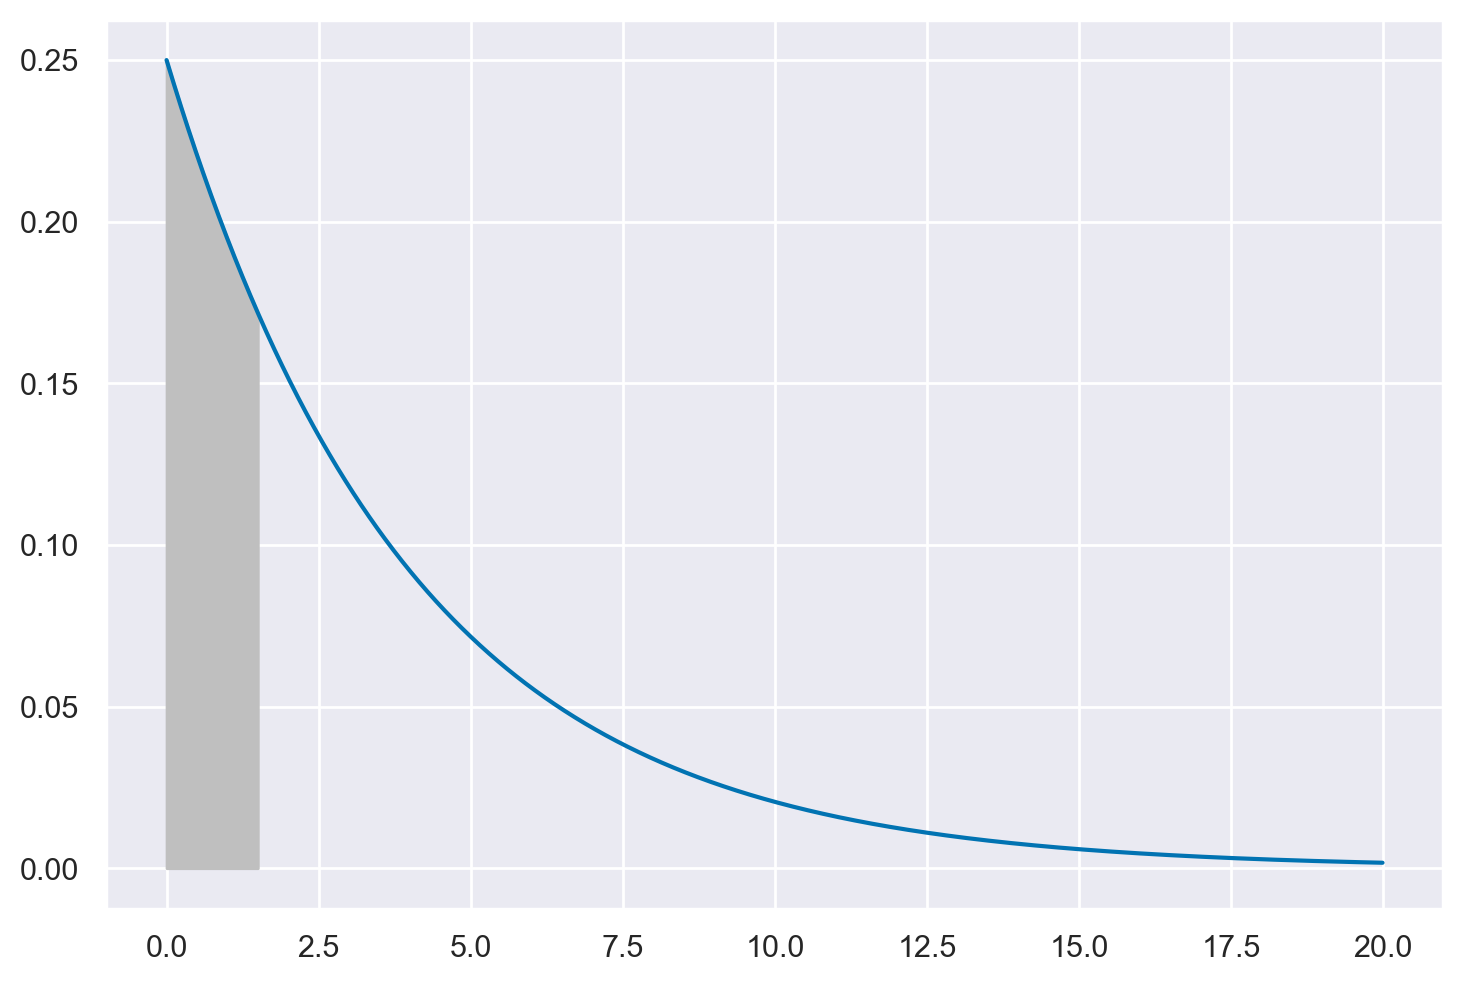

In [21]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=(x >= 0) & (x <= 1.5), color="0.75")


Possiamo trovare la risposta usando la funzione `cdf()`:

In [145]:
stats.expon.cdf(1.5, loc=0, scale=stdev) 

0.3127107212090278

Chiediamoci, ad esempio quale sia la probabilità di conoscere il voto dopo avere aspettato un tempo compreso tra 1 e 6 giorni. Dobbiamo trovare l'area sottesa alla funzione di densità nell'intervallo [1, 6]. Usando la fuzione di ripartizione, calcoliamo $F(6) - F(1) = P(X <= 6) - P(X <= 1)$.

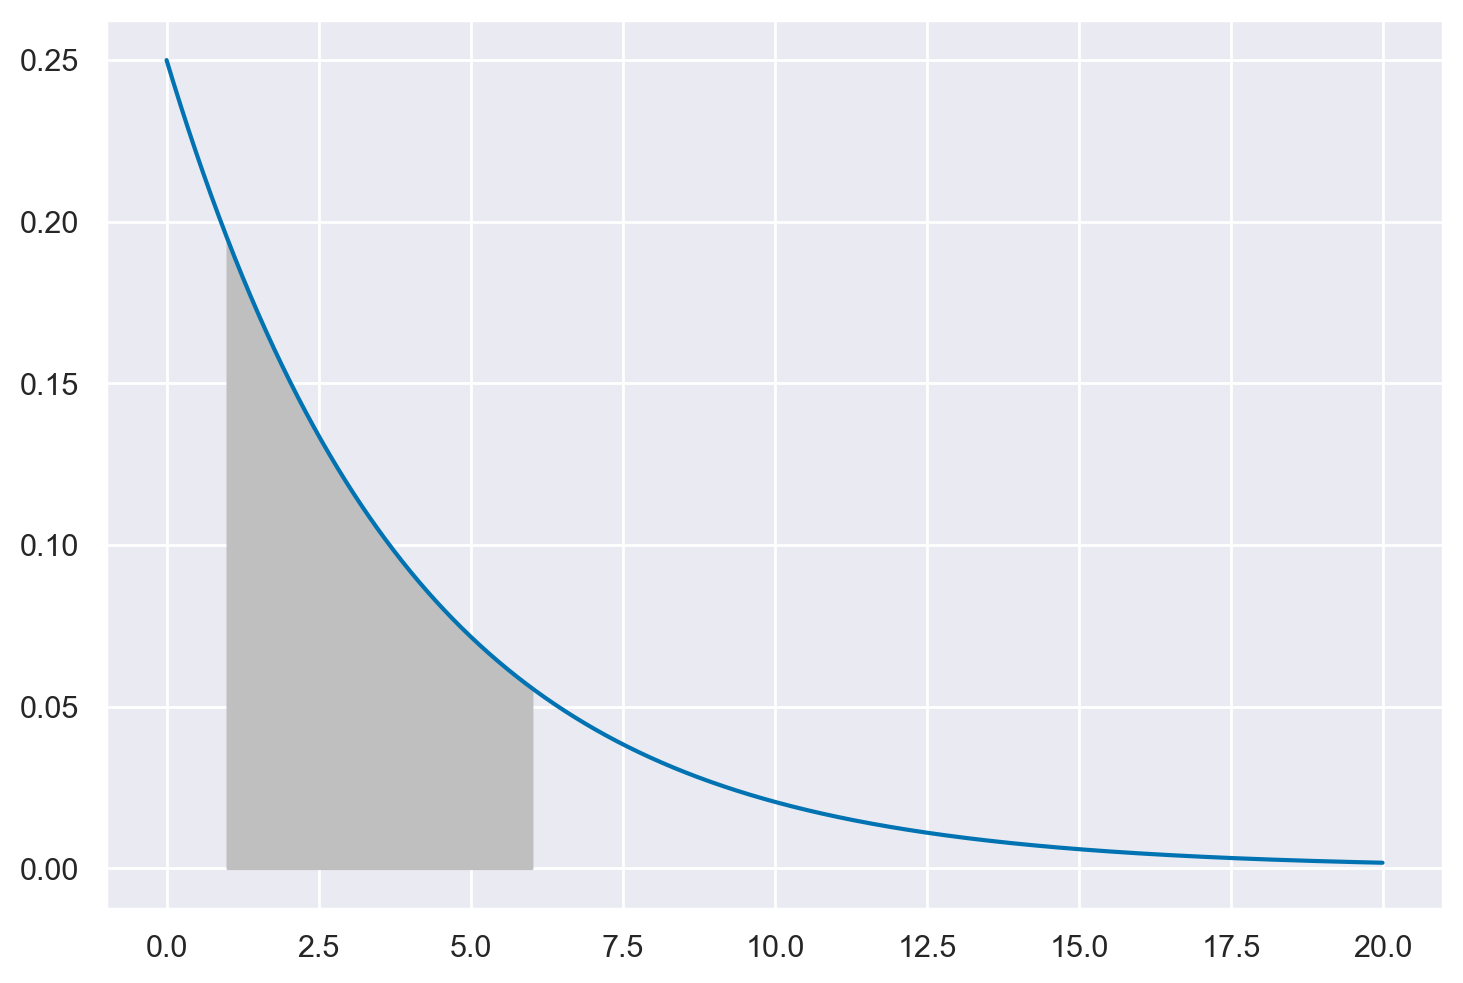

In [22]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=(x >= 1) & (x <= 6), color="0.75")

In [134]:
stats.expon.cdf(6, loc=0, scale=stdev) - stats.expon.cdf(1, loc=0, scale=stdev)

0.5556706229229751

Troviamo la probabilità di dovere aspettare almeno 5 giorni e mezzo. 

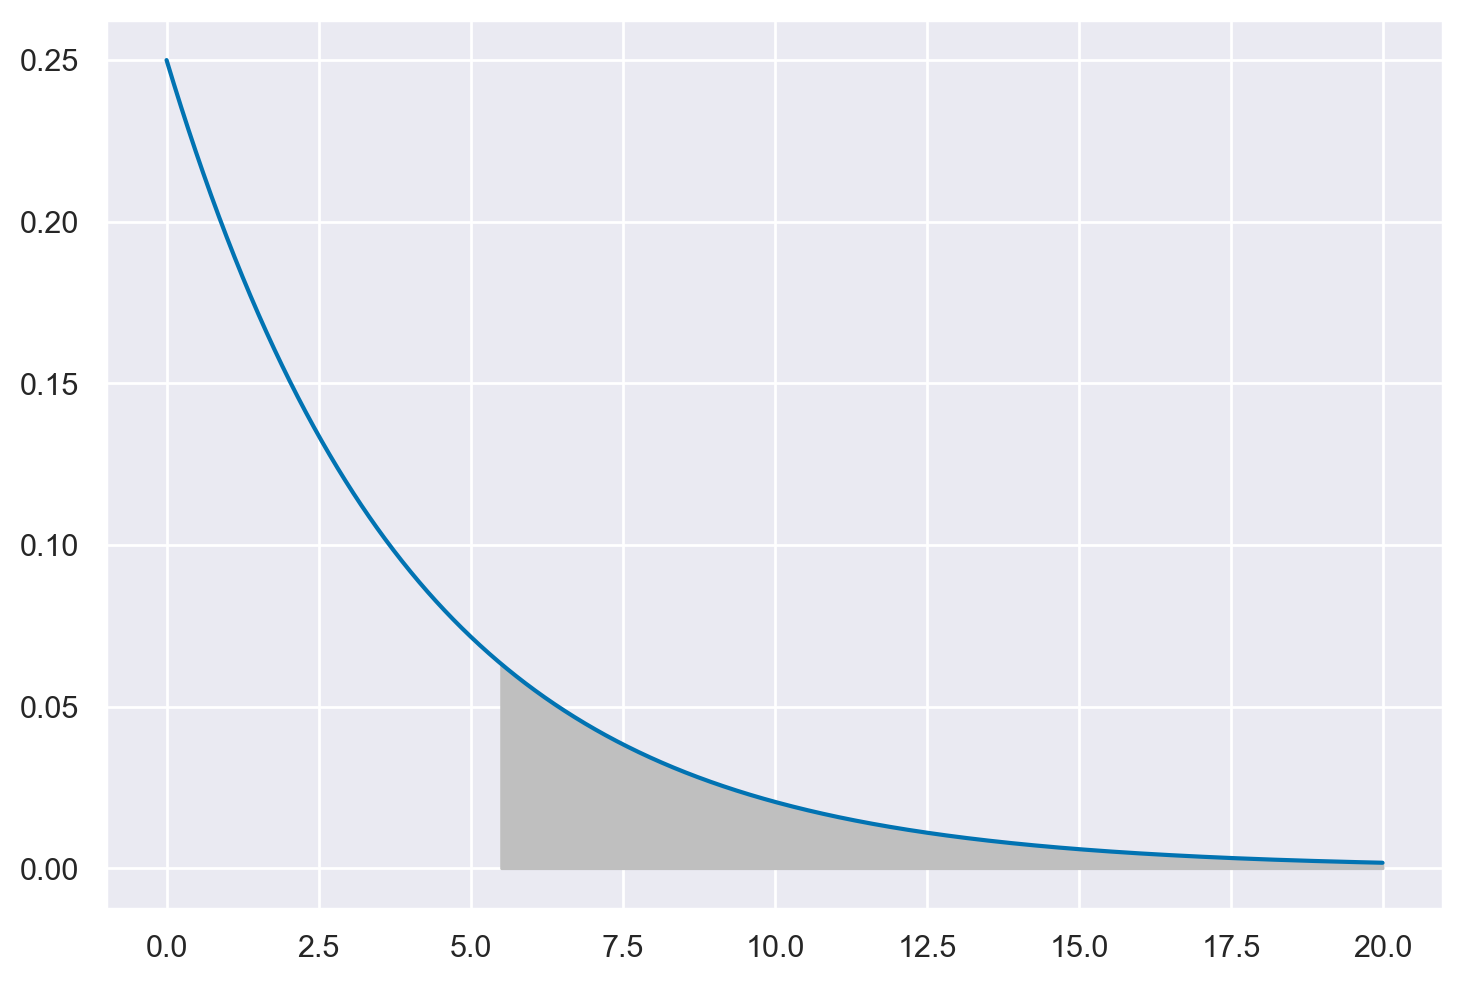

In [23]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=(x >= 5.5) & (x <= 21), color="0.75")


La probabilità cercata è data dalla probabilità dell'evento complementare di quello fornito dalla funzione di ripartizione.

In [142]:
1 - stats.expon.cdf(5.5, loc=0, scale=stdev) 

0.25283959580474646

Se la media del tempo di attesa nel Corso di Laurea fosse di 4 giorni, allora circa una volta su 4 lo studente dovrà aspettare almeno 5.5 giorni per conoscere il voto dello scritto.

La figura seguente mostra un istogramma di 1000000 valori casuali estratti dalla distribuzione esponenziale di parametro $\lambda = 1/4$. All'istogramma è sovrapposta la funzione di densità.

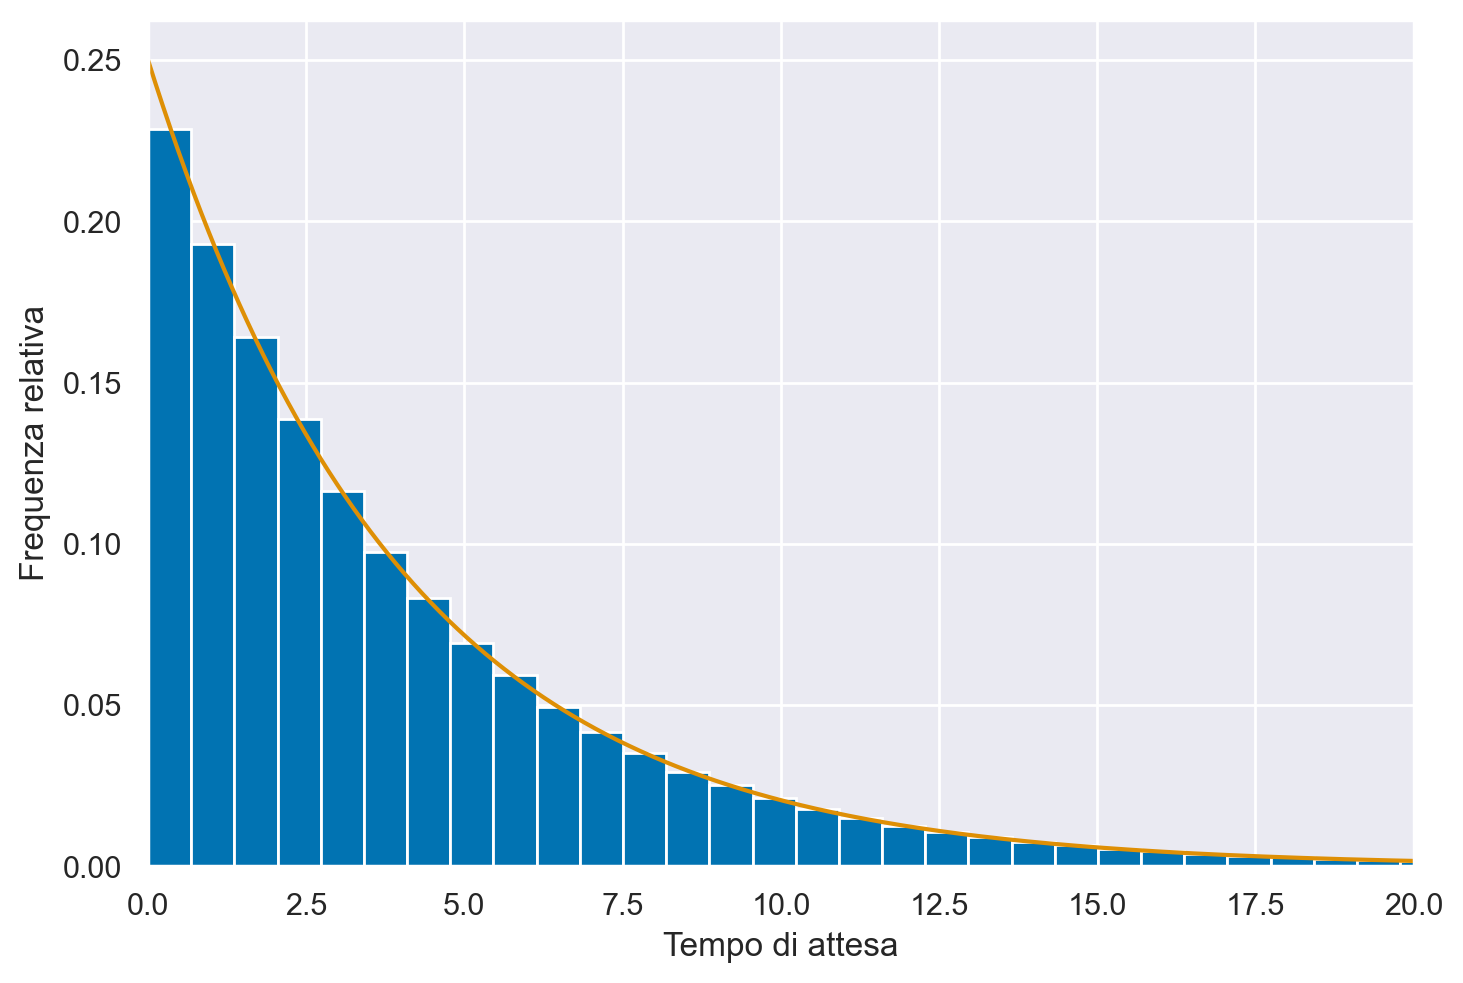

In [25]:
sexpon = stats.expon(loc=0, scale=stdev)
n = 1000000
samps = sexpon.rvs(size=n)
count, bins, ignored = plt.hist(samps, bins=100, density=True)
plt.plot(x, fx)
plt.xlim([0, 20])
plt.ylabel("Frequenza relativa")
_ = plt.xlabel("Tempo di attesa")


## Distribuzione Gaussiana
La più importante distribuzione di densità è la Gaussiana. Non c'è un'unica distribuzione gaussiana (o Normale): la distribuzione gaussiana è una famiglia di distribuzioni. Tali distribuzioni sono dette "gaussiane" in onore di Carl Friedrich Gauss (uno dei più grandi matematici della storia il quale, tra le altre cose, scoprì l'utilità di tale funzione di densità per descrivere gli errori di misurazione). Adolphe Quetelet, il padre delle scienze sociali quantitative, fu il primo ad applicare tale funzione di densità alle misurazioni dell'uomo. Karl Pearson usò per primo il termine "distribuzione normale" anche se ammise che questa espressione "ha lo svantaggio di indurre le persone a credere che le altre distribuzioni, in un senso o nell'altro, non siano normali."

### Limite delle distribuzioni binomiali

Iniziamo con un un breve excursus storico. Nel 1733, Abraham de Moivre notò che, aumentando il numero di prove di una distribuzione binomiale, la distribuzione risultante diventava quasi simmetrica e a forma campanulare. Con 10 prove e una probabilità di successo di 0.9, la distribuzione è chiaramente asimmetrica.

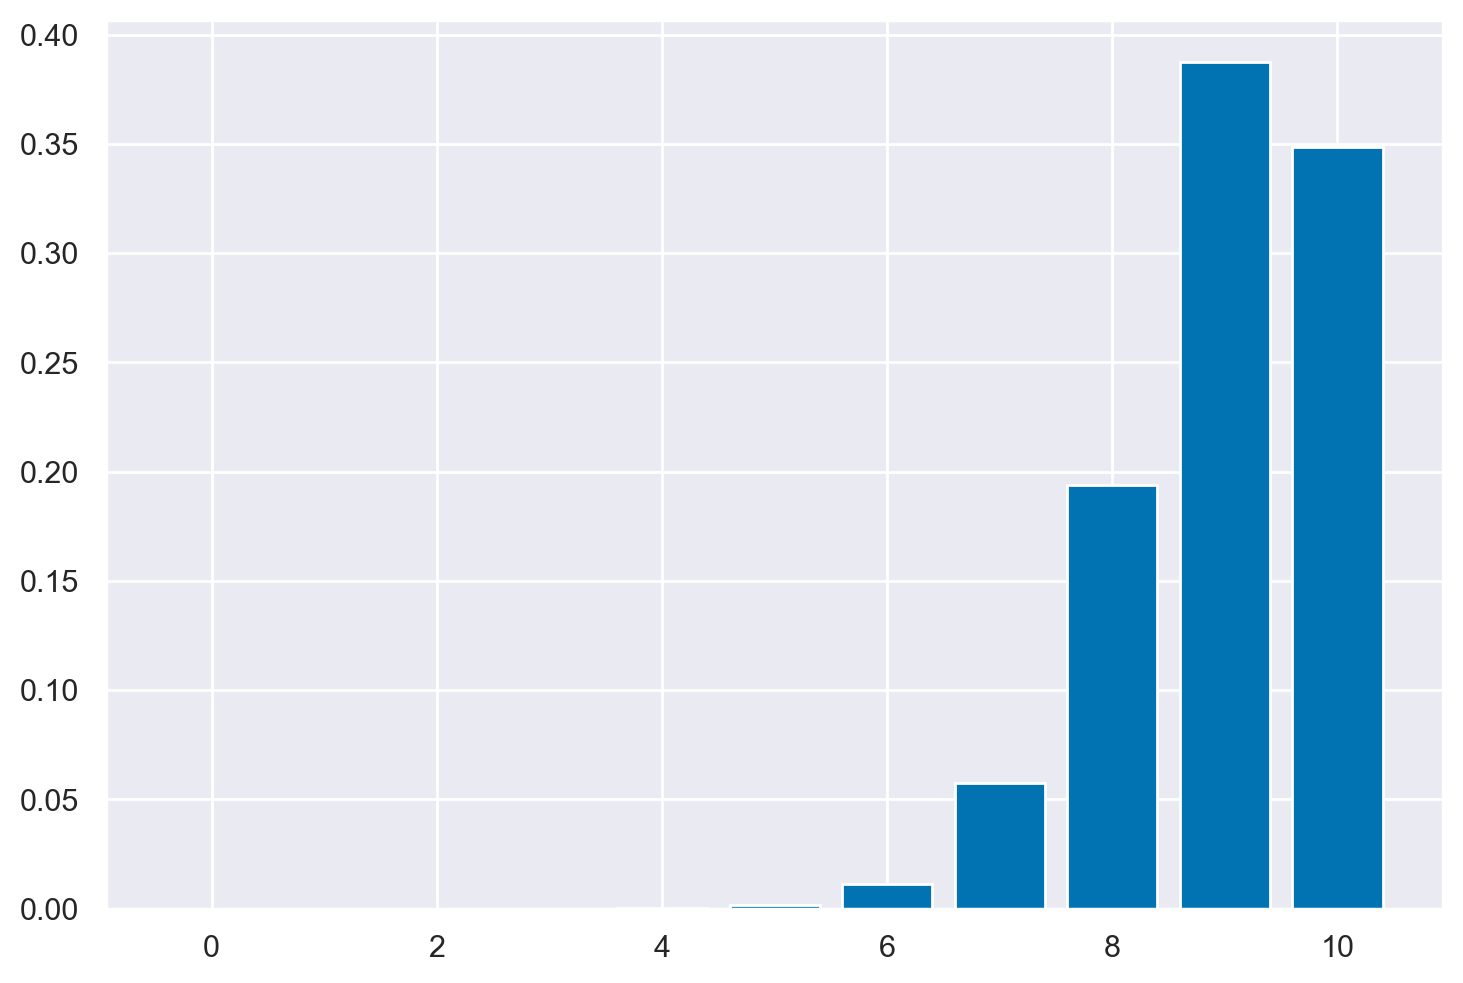

In [26]:
n = 10
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]
_ = plt.bar(r_values, dist)


Ma se aumentiamo il numero di prove di un fattore di 100 a *N* = 1000, senza modificare la probabilità di successo di 0.9, la distribuzione assume una forma campanulare quasi simmetrica. Dunque, de Moivre scoprì che, quando *N* è grande, la funzione gaussiana (che introdurremo qui sotto), nonostante sia la densità di v.c. continue, fornisce una buona approssimazione alla funzione di massa di probabilità binomiale.

(850.0, 950.0)

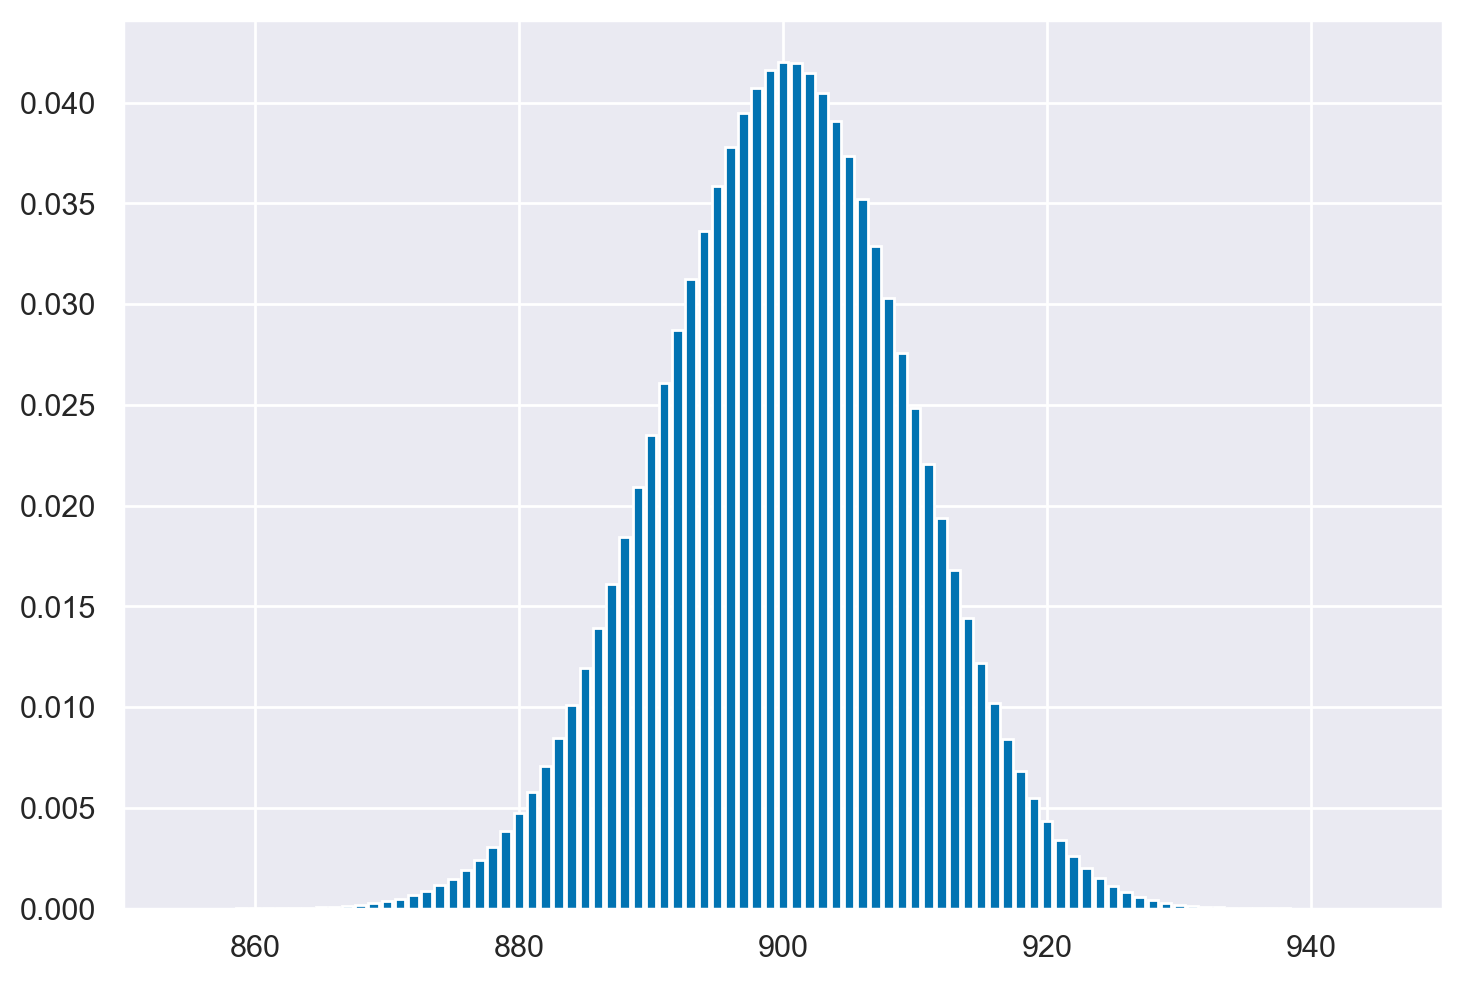

In [30]:
n = 1000
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]
plt.bar(r_values, dist)
plt.xlim(850, 950)


La distribuzione Normale fu scoperta da Gauss nel 1809. Il Paragrafo successivo illustra come si possa giungere alla Normale mediante una simulazione.

## La Normale prodotta con una simulazione

Il libro "Rethinking Statistics" di {cite:t}`McElreath_rethinking` spiega come sia possibile ottenere la distribuzione normale attraverso una simulazione. Immaginiamo di avere duemila persone che si trovano allineate su una linea di partenza. Quando viene dato il segnale di partenza, ogni persona lancia una moneta e compie un passo avanti o indietro a seconda del risultato del lancio. La lunghezza di ogni passo può variare da 0 a 1 metro. Ogni persona lancia la moneta 16 volte e quindi compie 16 passi.

In [31]:
def randomwalk(n):
    steps = []
    for i in range(n):
        rand = rng.integers(1, 3)
        if rand == 1:
            steps.append(-rng.uniform(0, 1))
        else:
            steps.append(rng.uniform(0, 1))
    walk = np.cumsum(steps)
    return walk

I valori ottenuti da una singola passeggiata casuale consistono nella distanza dall'origine (punto di partenza, indicato come 0) dopo un determinato numero di passi. Questi valori sono rappresentati da numeri. Per esempio:

In [32]:
particularWalk = randomwalk(16)
print(*particularWalk)

0.37531838354697544 1.0584896463887754 1.4534636834009325 1.2937899514171627 1.5447231066244227 1.3373023369291819 1.3254604685050029 0.7344137731826899 1.136894490699304 1.9684525255384093 1.8250625862950245 1.016357414464169 1.231202594793971 2.1991617340098744 2.3950630949221305 2.4013927428252604


Alla conclusione di queste passeggiate casuali (*random walk*) non possiamo sapere con esattezza dove si troverà ciascuna persona, ma possiamo conoscere con certezza le caratteristiche della distribuzione delle 2000 distanze dall'origine. 

Text(0, 0.5, "Distanza dall'origine")

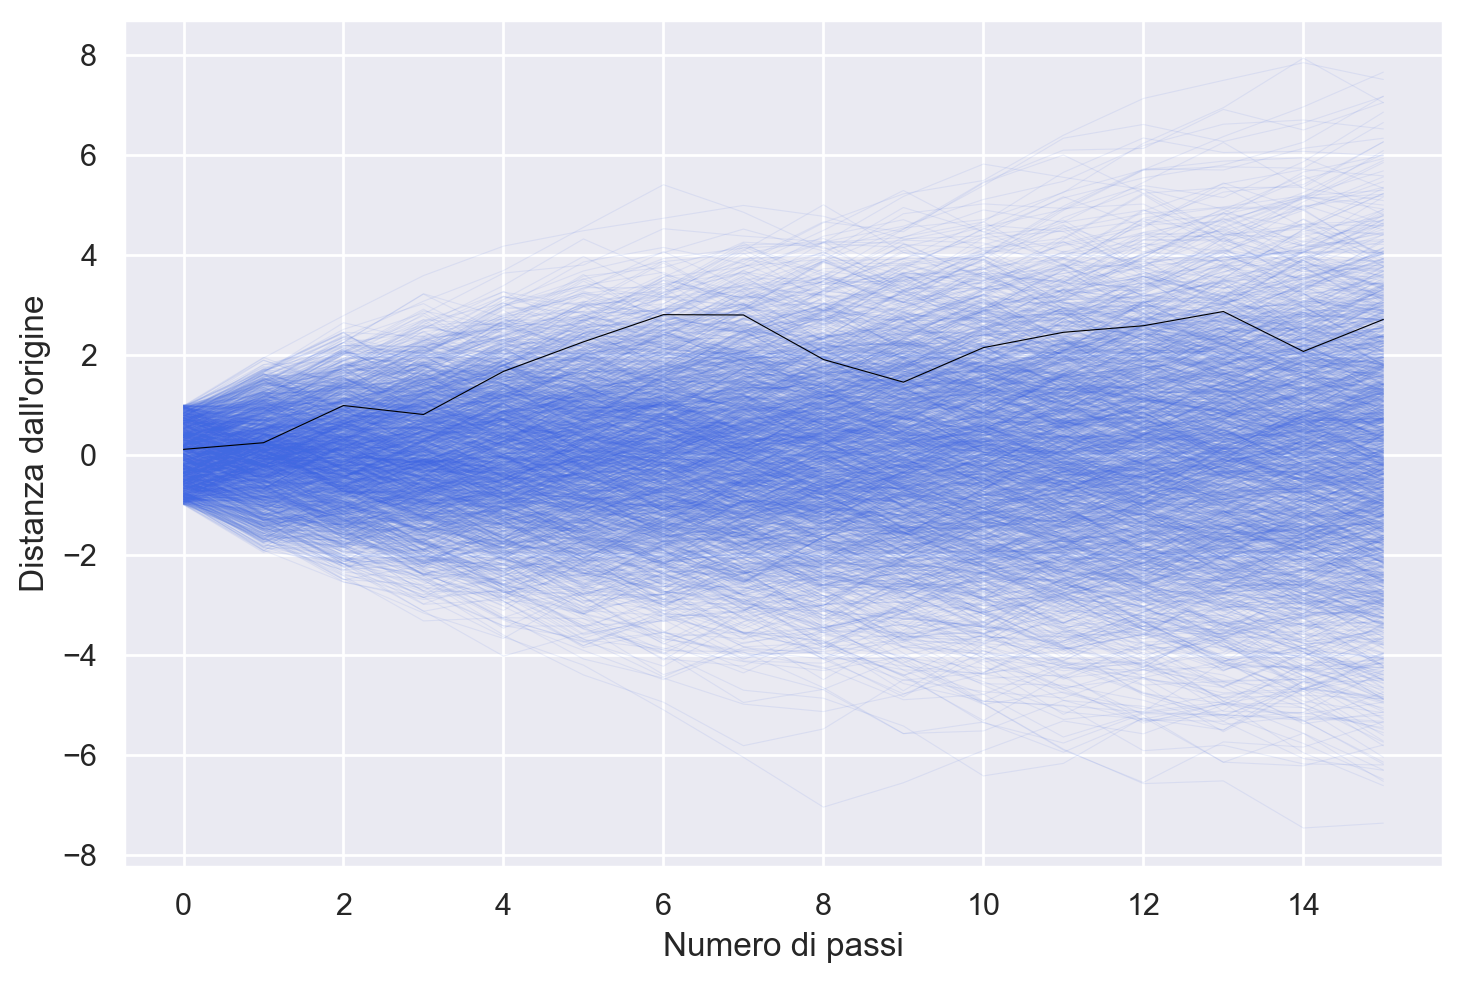

In [33]:
for k in range(2000):
    particularWalk = randomwalk(16)
    plt.plot(np.arange(16), particularWalk, color="royalblue", linewidth=0.4, alpha=0.1)

plt.plot(np.arange(16), particularWalk, color="black", linewidth=0.4)
plt.xlabel("Numero di passi")
plt.ylabel("Distanza dall'origine")

Per esempio, possiamo predire in maniera accurata la proporzione di persone che si sono spostate in avanti oppure all'indietro. Oppure, possiamo predire accuratamente la proporzione di persone che si troveranno ad una certa distanza dalla linea di partenza (es., a 1.5 m dall'origine). Queste predizioni sono possibili perché tali distanze si distribuiscono secondo la legge Normale (la curva rossa nel grafico seguente). 

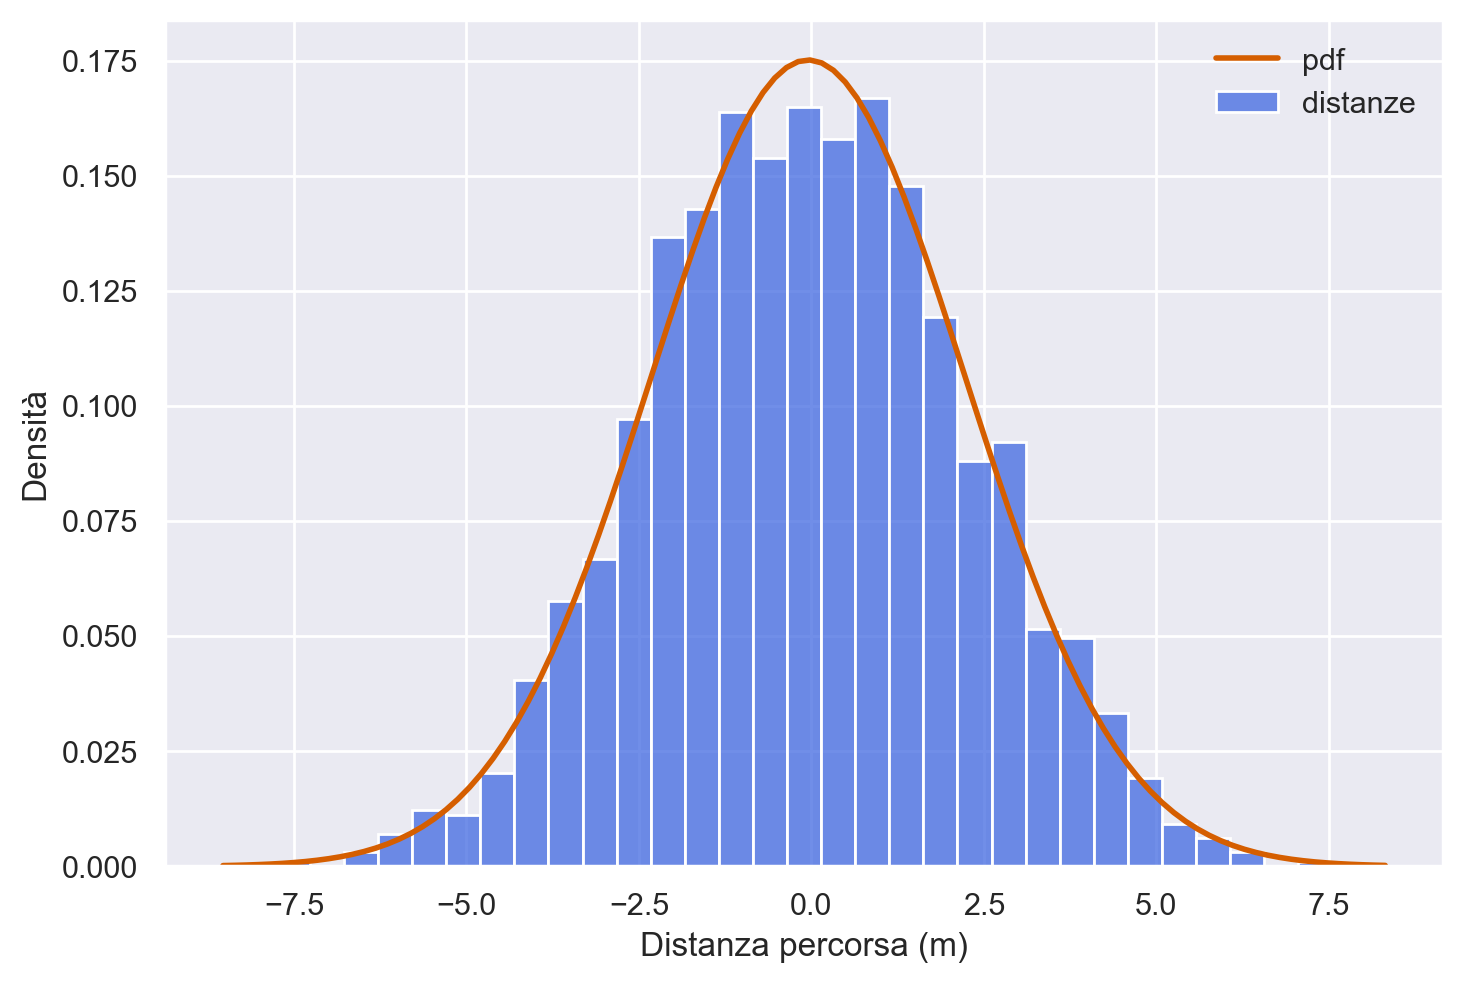

In [34]:
distances = []
for k in range(2000):
    distances.append(randomwalk(16)[15])

avg_distances = np.mean(distances)
std_distances = np.std(distances)

ax = sns.histplot(
    distances, kde=False, stat="density", label="distanze", color="royalblue"
)
# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = stats.norm.pdf(x_pdf, avg_distances, std_distances)
ax.plot(x_pdf, y_pdf, "r", lw=2, label="pdf")
ax.legend()
ax.set(xlabel="Distanza percorsa (m)", ylabel="Densità")
plt.show()


Questa simulazione dimostra che qualsiasi processo che prevede la somma di un certo numero di valori casuali, tutti provenienti dalla stessa distribuzione, alla fine converge ad una distribuzione normale. Non importa quale sia la forma della distribuzione di partenza, che può essere uniforme come nell'esempio mostrato o di qualsiasi altro tipo. La forma della distribuzione da cui viene realizzato il campionamento determina la velocità di convergenza alla distribuzione normale. In alcuni casi, la convergenza può essere lenta, mentre in altri casi, come nell'esempio mostrato, la convergenza può essere molto rapida. È possibile osservare lo stesso principio tramite la [Galton box](https://en.wikipedia.org/wiki/Galton_board). 

Dal punto di vista formale, possiamo definire una variabile casuale continua $Y$ come avente una distribuzione normale se la sua densità di probabilità è distribuita secondo la seguente equazione

$$
f(y; \mu, \sigma) = {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y -  \mu)^2}{2 \sigma^2} \right\},
$$ (eq-normal-formula)

dove $\mu \in \mathbb{R}$ e $\sigma > 0$ sono i parametri della distribuzione.

La densità normale è unimodale e simmetrica con una caratteristica forma a campana e con il punto di massima densità in corrispondenza di $\mu$.

Il significato dei parametri $\mu$ e $\sigma$ che appaiono nell'eq. {eq}`eq-normal-formula` viene chiarito dalla dimostrazione che

$$
\mathbb{E}(Y) = \mu, \qquad \mathbb{V}(Y) = \sigma^2.
$$

La rappresentazione grafica di quattro densità Normali con medie -1, -0.5, 0, 1 e con deviazioni standard 0.25, 0.5, 1 e 2 è fornita nella figura seguente.

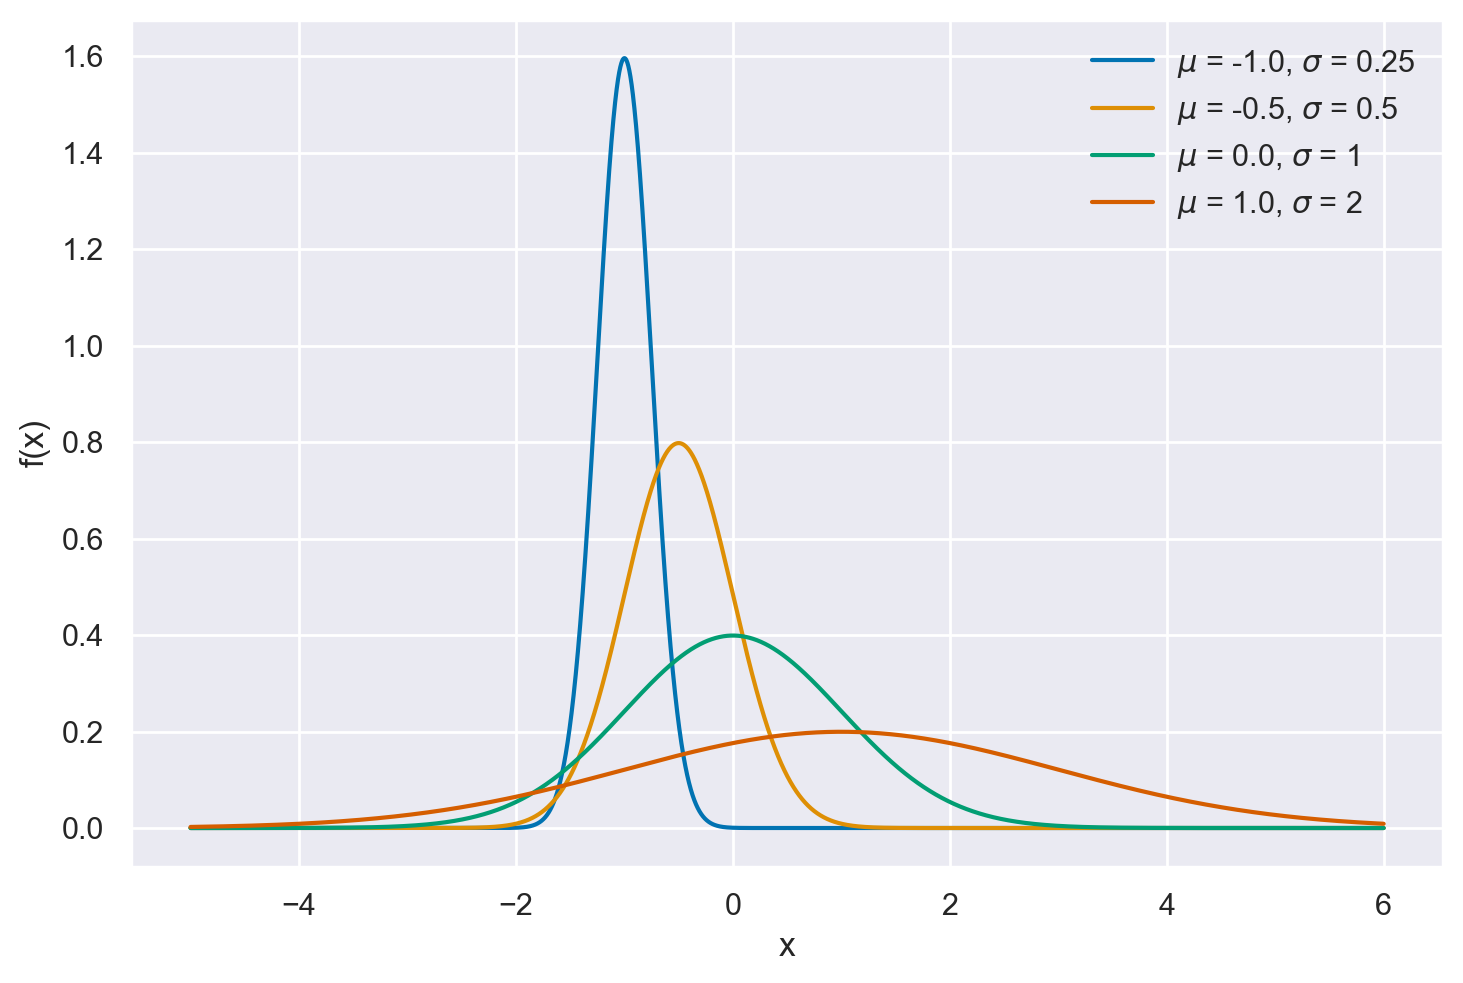

In [35]:
x = np.arange(-5, 6, 0.001)

mus = [-1.0, -0.5, 0.0, 1.0]
sigmas = [0.25, 0.5, 1, 2]
for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1)


### Concentrazione

È istruttivo osservare il grado di concentrazione della distribuzione Normale attorno alla media:

$$
\begin{align}
P(\mu - \sigma < Y < \mu + \sigma) &= P (-1 < Z < 1) \simeq 0.683, \notag\\
P(\mu - 2\sigma < Y < \mu + 2\sigma) &= P (-2 < Z < 2) \simeq 0.956, \notag\\
P(\mu - 3\sigma < Y < \mu + 3\sigma) &= P (-3 < Z < 3) \simeq 0.997. \notag
\end{align}
$$

Si noti come un dato la cui distanza dalla media è superiore a 3 volte la deviazione standard presenti un carattere di eccezionalità perché meno del 0.3% dei dati della distribuzione Normale presentano questa caratteristica.

Per indicare la distribuzione Normale si usa la notazione $\mathcal{N}(\mu, \sigma)$.

### Funzione di ripartizione

Il valore della funzione di ripartizione di $Y$ nel punto $y$ è l'area sottesa alla curva di densità $f(y)$ nella semiretta $(-\infty, y]$. Non esiste alcuna funzione elementare per la funzione di ripartizione

$$
F(y) = \int_{-\infty}^y {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y - \mu)^2}{2\sigma^2} \right\} dy, 
$$ (eq-gaussian-rip-formula)

pertanto le probabilità $P(Y < y)$ vengono calcolate mediante integrazione numerica approssimata. I valori della funzione di ripartizione di una variabile casuale Normale sono dunque forniti da un software.

Esaminiamo le funzioni fornite da `scipy.stats` per la densità Normale. Il metodo `.norm.rvs()` produce un valore casuale estratto dalla distribuzione Normale specificata. Per esempio, un valore casuale dalla $\mathcal{N}(\mu = 100, \sigma = 15)$ è:

In [3]:
stats.norm.rvs(loc=100, scale=15)


101.02786073753111

Estraiamo ora 10 valori a caso dalla $\mathcal{N}(100, 15)$:

In [4]:
qi = stats.norm.rvs(loc=100, scale=15, size=10)
print(*qi)


75.05705567433097 91.27489415447812 109.68768721861458 102.0271340052463 127.65930939997654 101.42094568514196 114.98838314393396 93.42405828328144 91.30533995037935 100.35195291353871


Per trovare la probabilità che un'osservazione estratta a caso dalla $\mathcal{N}(100, 15)$ abbia un valore minore o uguale a, diciamo, 115, troviamo il valore della funzione di ripartizione (o funzione cumulativa di densità) nel punto 115.

In [5]:
stats.norm.cdf(115, 100, 15)


0.8413447460685429

Questa è l'area sottesa alla funzione di densità nell'intervallo $[-\infty, 115]$, come indicato nella figura seguente.

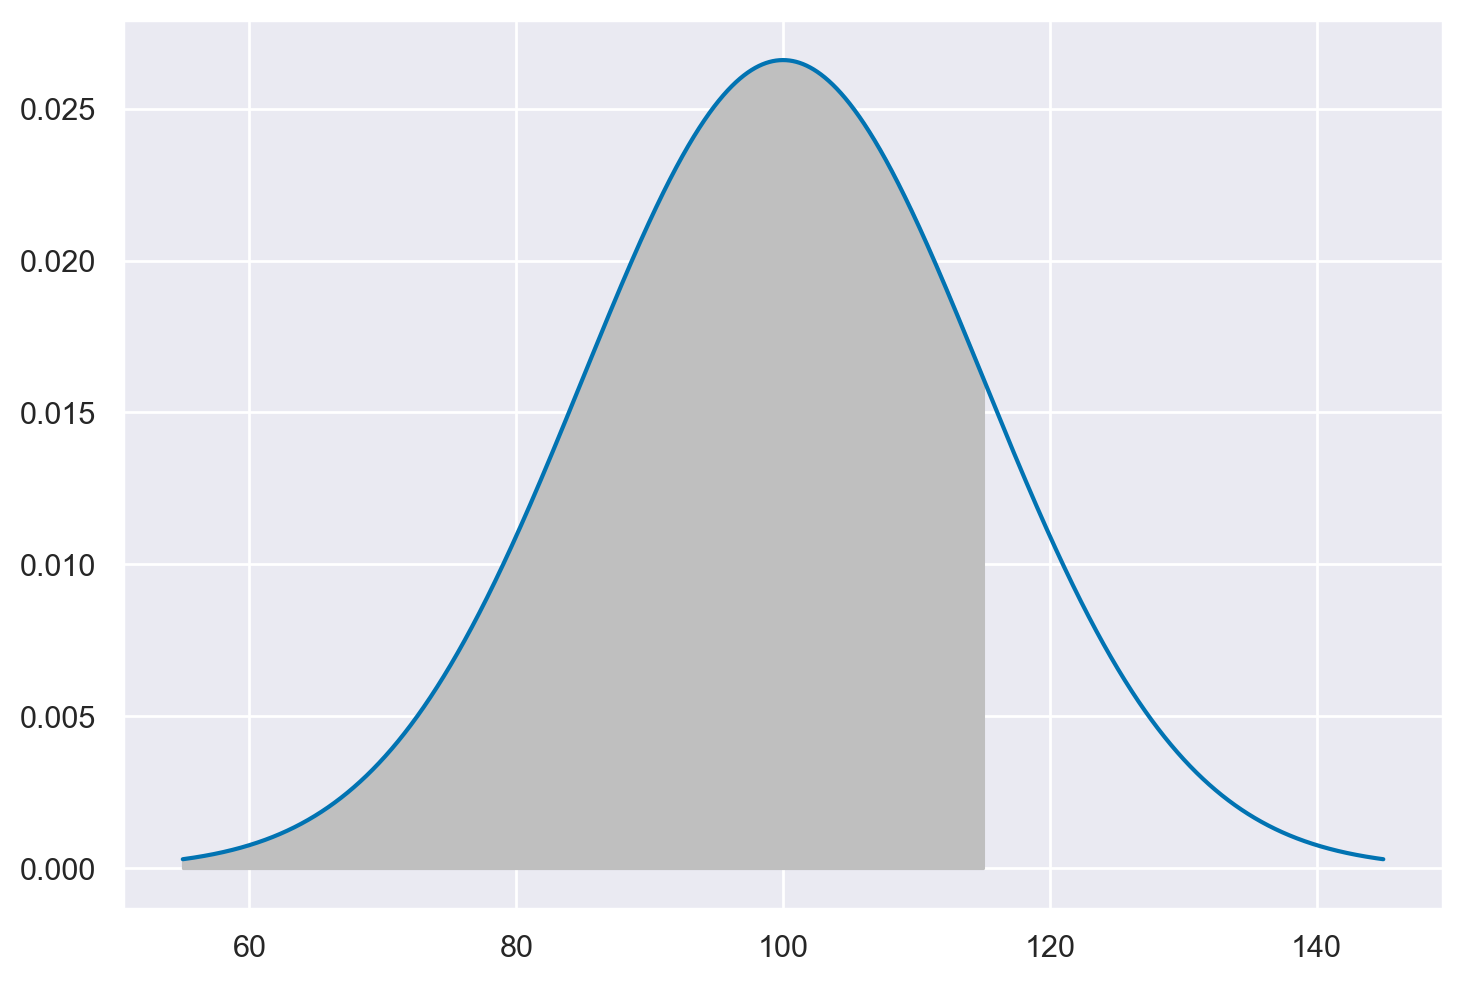

In [37]:
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=x <= 115, color="0.75")


Solo per fare un esempio, qui di seguito fornisco il codice Python per calcolare l'integrale che stiamo discutendo per mezzo della funzione `quad` della libreria SciPy:

In [39]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )


mu = 100
sigma = 15
result, error = quad(gaussian, -1000, 115, args=(mu, sigma))
print("Il risultato è", result, "con errore", error)

Il risultato è 0.841344746068543 con errore 4.0191205799653545e-10


Il risultato replica quello prodotto da `.norm.cdf()`.

Per trovare la proporzione di persone nella popolazione che hanno un QI maggiore di 2 deviazioni standard dalla media consideriamo l'evento complementare:

In [27]:
1 - stats.norm.cdf(130, 100, 15)


0.02275013194817921

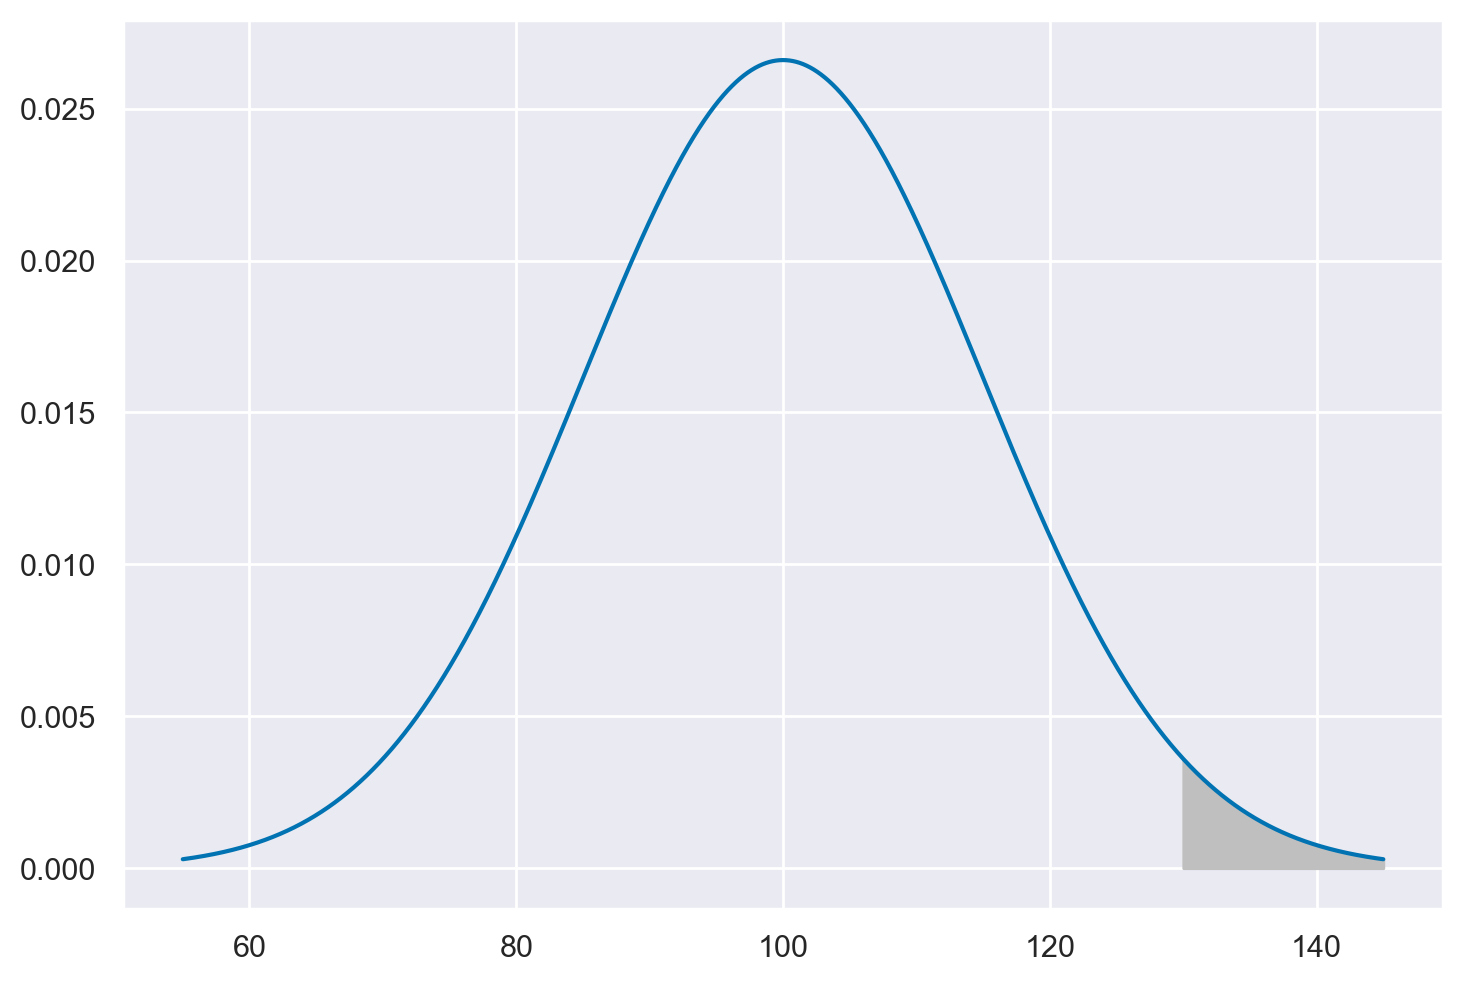

In [40]:
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=x >= 130, color="0.75")

In maniera equivalente, possiamo usare la *Survival Function*:

In [28]:
stats.norm.sf(130, 100, 15)


0.022750131948179195

La funzione `ppf` restituisce il quantile della Normale. Ad esempio:

In [30]:
stats.norm.ppf(1 - 0.022750131948179195, 100, 15)


130.0

### Distribuzione Normale standard

La distribuzione Normale di parametri $\mu = 0$ e $\sigma = 1$ viene detta *distribuzione Normale standard*. La famiglia Normale è l'insieme avente come elementi tutte le distribuzioni Normali con parametri $\mu$ e $\sigma$ diversi. Tutte le distribuzioni Normali si ottengono dalla Normale standard mediante una trasformazione lineare: se $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$ allora

$$
X = a + b Y \sim \mathcal{N}(\mu_X = a+b \mu_Y, \sigma_X = \left|b\right|\sigma_Y).
$$

L'area sottesa alla curva di densità di $\mathcal{N}(\mu, \sigma)$ nella semiretta $(-\infty, y]$ è uguale all'area sottesa alla densità Normale standard nella semiretta $(-\infty, z]$, in cui $z = (y -\mu_Y )/\sigma_Y$ è il punteggio standard di $Y$. Per la simmetria della distribuzione, l'area sottesa nella semiretta $[1, \infty)$ è uguale all'area sottesa nella semiretta $(-\infty, 1]$ e quest'ultima coincide con $F(-1)$. Analogamente, l'area sottesa nell'intervallo $[y_a, y_b]$, con $y_a < y_b$, è pari a $F(z_b) - F(z_a)$, dove $z_a$ e $z_b$ sono i punteggi standard di $y_a$ e $y_b$.

Si ha anche il problema inverso rispetto a quello del calcolo delle aree: dato un numero $0 \leq p \leq 1$, il problema è quello di determinare un numero $z \in \mathbb{R}$ tale che $P(Z < z) = p$. Il valore $z$ cercato è detto *quantile* di ordine $p$ della Normale standard e può essere trovato mediante un software.

Supponiamo che l'altezza degli individui adulti segua la distribuzione Normale di media $\mu = 1.7$ m e deviazione standard $\sigma = 0.1$ m. Vogliamo sapere la proporzione di individui adulti con un'altezza compresa tra $1.7$ e $1.8$ m.

Il problema ci chiede di trovare l'area sottesa alla distribuzione $\mathcal{N}(\mu = 1.7, \sigma = 0.1)$ nell'intervallo $[1.7, 1.8]$:

In [32]:
stats.norm.cdf(1.8, 1.7, 0.1) - stats.norm.cdf(1.7, 1.7, 0.1)


0.34134474606854315

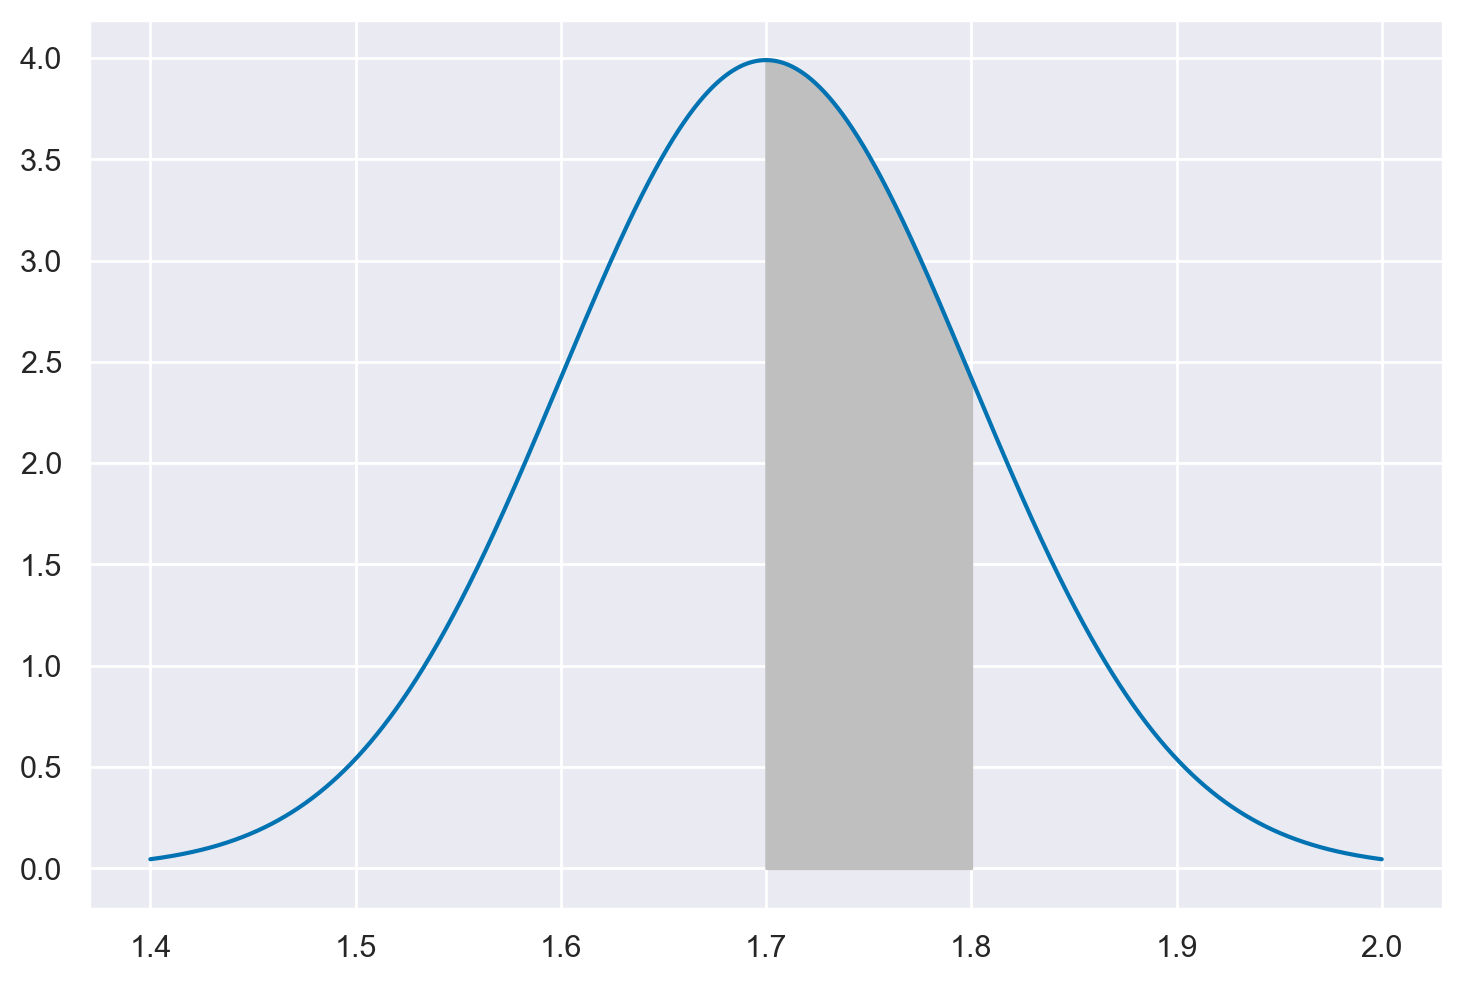

In [41]:
mu = 1.7
sigma = 0.1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=(x >= 1.7) & (x <= 1.8), color="0.75")


In maniera equivalente, possiamo standardizzare i valori che delimitano l'intervallo considerato e utilizzare la funzione di ripartizione della normale standardizzata. I limiti inferiore e superiore dell'intervallo sono

$$
z_{\text{inf}} = \frac{1.7 - 1.7}{0.1} = 0, \quad z_{\text{sup}} = \frac{1.8 - 1.7}{0.1} = 1.0,
$$

quindi otteniamo

In [33]:
stats.norm.cdf(1.0, 0, 1) - stats.norm.cdf(0, 0, 1)


0.3413447460685429

Il modo più semplice per risolvere questo problema resta comunque quello di rendersi conto che la probabilità richiesta non è altro che la metà dell'area sottesa dalle distribuzioni Normali nell'intervallo $[\mu - \sigma, \mu + \sigma]$, ovvero $0.683/2$.

## Distribuzione Chi-quadrato

Dalla Normale deriva la distribuzione $\chi^2$. La distribuzione $\chi^2_{~k}$ con $k$ gradi di libertà descrive la variabile casuale

$$
Z_1^2 + Z_2^2 + \dots + Z_k^2,
$$

dove $Z_1, Z_2, \dots, Z_k$ sono variabili casuali i.i.d. che seguono la distribuzione Normale standard $\mathcal{N}(0, 1)$. La variabile casuale chi-quadrato dipende dal parametro intero positivo $\nu = k$ che ne identifica il numero di gradi di libertà. La densità di probabilità di $\chi^2_{~\nu}$ è

$$
f(x) = C_{\nu} x^{\nu/2-1} \exp (-x/2), \qquad \text{se } x > 0,
$$

dove $C_{\nu}$ è una costante positiva.

La figura seguente mostra alcune distribuzioni Chi-quadrato variando il parametro $\nu$.

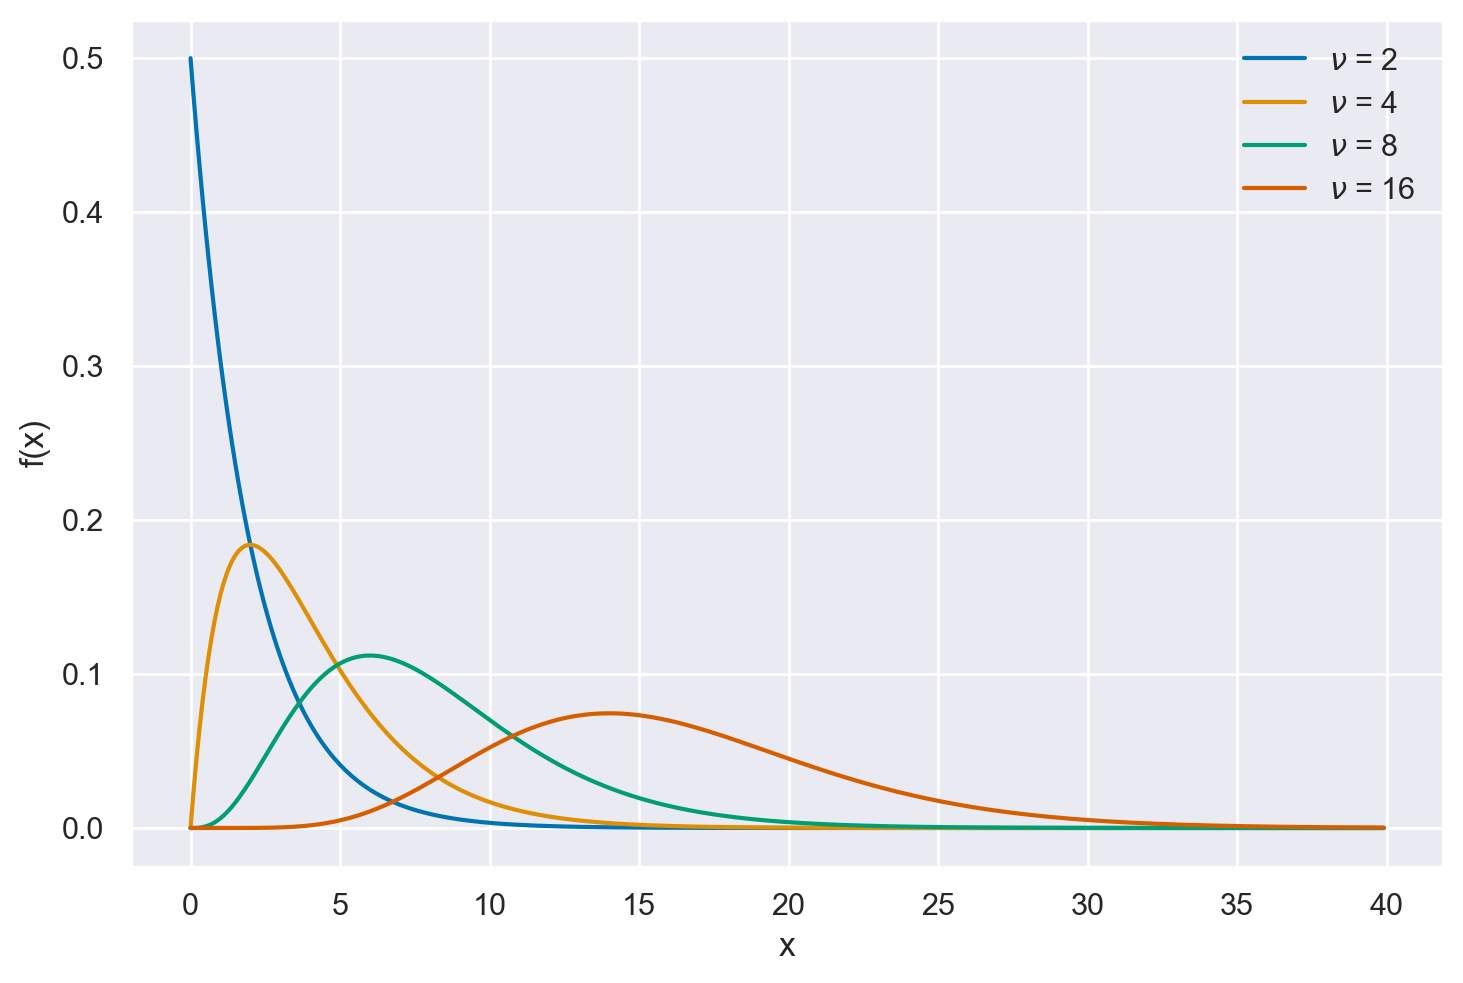

In [42]:
x = np.arange(0, 40, 0.1)

nus = [2, 4, 8, 16]
for nu in nus:
    pdf = stats.chi2.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1)

### Proprietà

-   La distribuzione di densità $\chi^2_{~\nu}$ è asimmetrica.
-   Il valore atteso di una variabile $\chi^2_{~\nu}$ è uguale a $\nu$.
-   La varianza di una variabile $\chi^2_{~\nu}$ è uguale a $2\nu$.
-   Per $k \rightarrow \infty$, la $\chi^2_{~\nu} \rightarrow \mathcal{N}$.
-   Se $X$ e $Y$ sono due variabili casuali chi-quadrato indipendenti con $\nu_1$ e $\nu_2$ gradi di libertà, ne segue che $X + Y \sim \chi^2_m$, con $m = \nu_1 + \nu_2$. Tale principio si estende a qualunque numero finito di variabili casuali chi-quadrato indipendenti.


Per fare un esempio, consideriamo la v.c. $\chi^2_5$.

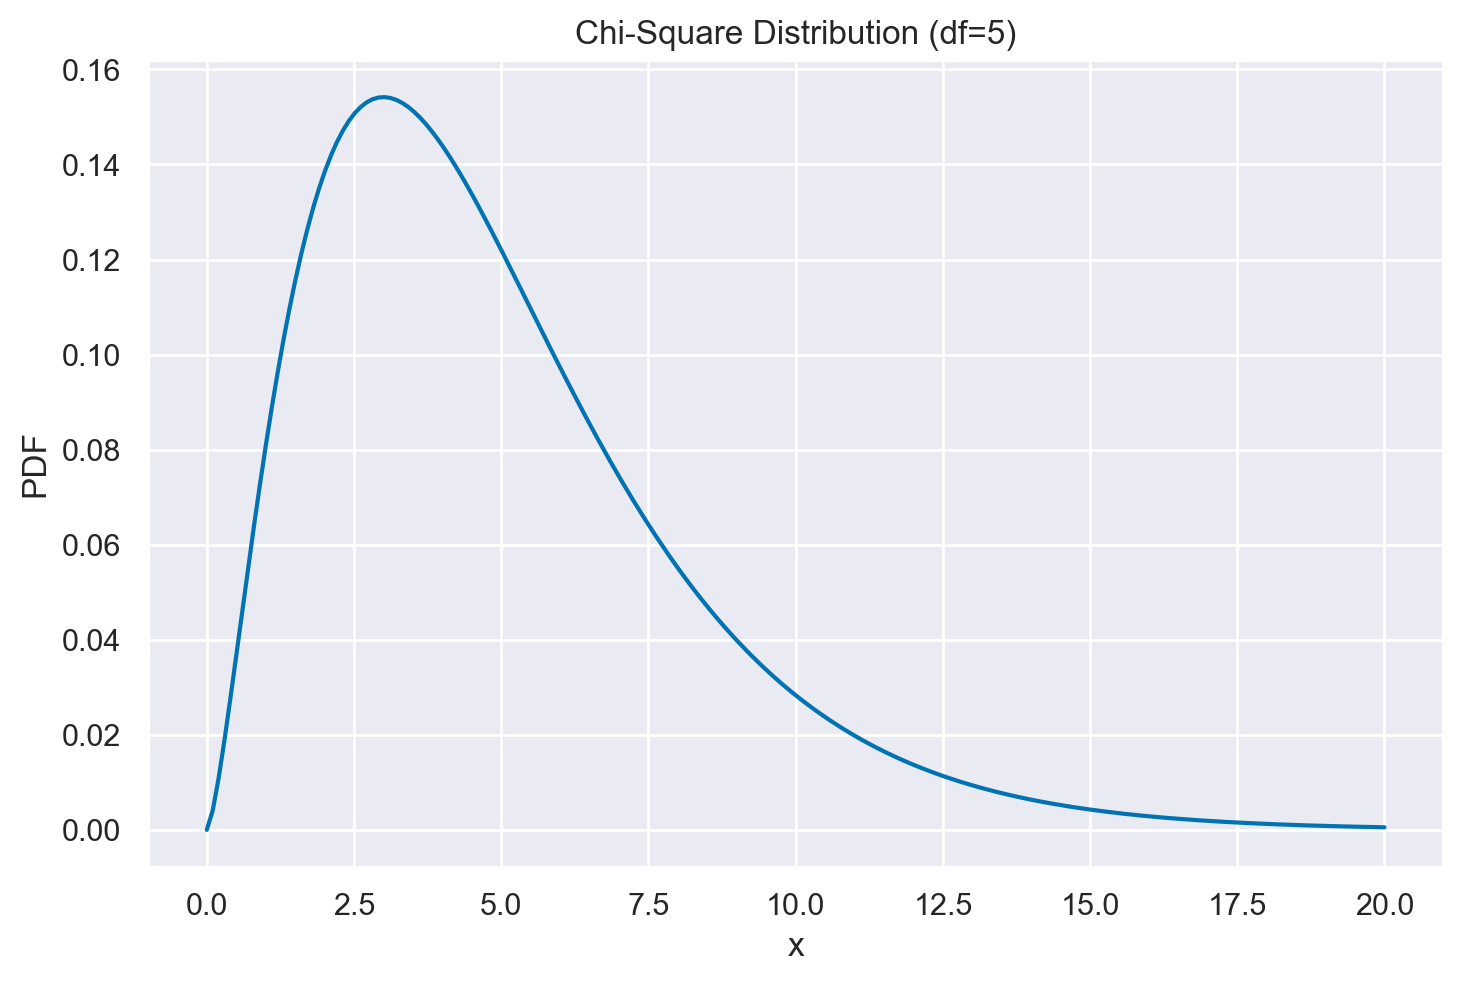

In [43]:
# Set the degrees of freedom
df = 5

# Create a chi-square distribution object
chi2_dist = stats.chi2(df)

# Generate x values for the plot
x = np.linspace(0, 20, 200)

# Calculate the probability density function (PDF) of the chi-square distribution for x values
pdf = chi2_dist.pdf(x)

# Plot the PDF
plt.plot(x, pdf)
plt.title('Chi-Square Distribution (df=5)')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

Generiamo 1000000 valori da questa distribuzione.

In [24]:
x = chi2_dist.rvs(1000000)
x[0:20]

array([ 6.39415672,  6.79548174,  5.55757926, 11.97360145,  5.47851441,
        2.53488157,  3.23297718,  3.53335387,  4.08264301,  5.16829439,
        3.27085865,  3.0803455 ,  4.35794583,  2.29173125, 10.78444656,
        6.6934051 ,  7.28002782,  8.50074847,  4.11266781,  3.9019652 ])

Calcoliamo la media di questi valori.

In [25]:
np.mean(x)

5.003788977920302

Calcolo la varianza.

In [26]:
np.var(x, ddof=0)

9.998441233170656

## Distribuzione $t$ di Student

Dalle distribuzioni Normale e Chi-quadrato deriva un'altra distribuzione molto nota, la $t$ di Student. Se $Z \sim \mathcal{N}$ e $W \sim \chi^2_{~\nu}$ sono due variabili casuali indipendenti, allora il rapporto

$$
T = \frac{Z}{\Big( \frac{W}{\nu}\Big)^{\frac{1}{2}}}
$$ (eq-student-t-distr)

definisce la distribuzione $t$ di Student con $\nu$ gradi di libertà. Si usa scrivere $T \sim t_{\nu}$. L'andamento della distribuzione $t$ di Student è simile a quello della distribuzione Normale, ma ha una dispersione maggiore (ha le code più pesanti di una Normale, ovvero ha una varianza maggiore di 1).

La seguente mostra alcune distribuzioni $t$ di Student variando il parametro $\nu$.

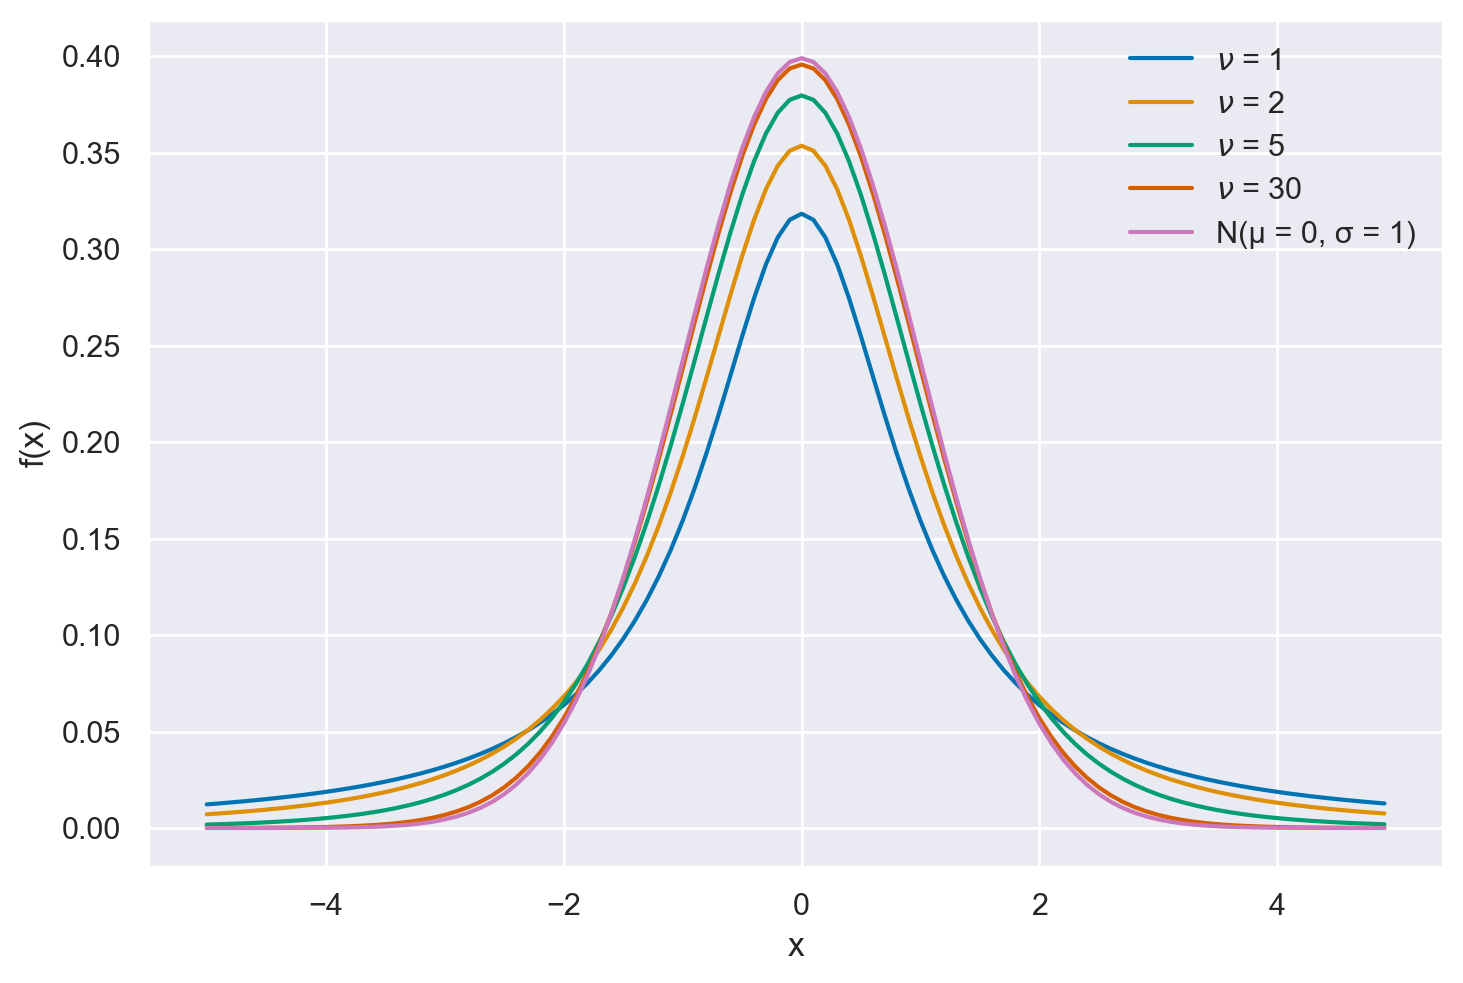

In [44]:
x = np.arange(-5, 5, 0.1)

nus = [1, 2, 5, 30]
for nu in nus:
    pdf = stats.t.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.plot(x, stats.norm.pdf(x, 0, 1), label="N(μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1)

### Proprietà

La variabile casuale $t$ di Student soddisfa le seguenti proprietà:

1.  Per $\nu \rightarrow \infty$, $t_{\nu}$ tende alla normale standard $\mathcal{N}(0, 1)$.
2.  La densità della $t_{\nu}$ è una funzione simmetrica con valore atteso nullo.
3.  Per $\nu > 2$, la varianza della $t_{\nu}$ vale $\nu/(\nu - 2)$; pertanto è sempre maggiore di 1 e tende a 1 per $\nu \rightarrow \infty$.


Per esempio, calcoliamo il valore della funzione di ripartizione di ordine 0.025 nel caso di una $t_{30}$.

In [27]:
stats.t.ppf(0.025, 30)

-2.042272456301238

Aumentiamo i gradi di libertà: $\nu$ = 1000.

In [30]:
stats.t.ppf(0.025, 1000)

-1.9623390808264078

Questo valore è quasi identico a quello della Normale stanardizzata.

In [31]:
stats.norm.ppf(0.025, 0, 1)

-1.9599639845400545

La ragione per cui il quantile della distribuzione $t$ con $\nu=30$ è maggiore (in valore assoluto) del quantile omotetico della distribuzione Normale Standard è che la distribuzione $t$ ha una varianza maggiore rispetto alla distribuzione Normale Standard.

## Funzione beta di Eulero

La funzione beta di Eulero è una funzione matematica, *non* una densità di probabilità. La menzioniamo qui perché viene utilizzata nella distribuzione Beta. La funzione beta di Eulero si può scrivere in molti modi diversi; per i nostri scopi la presentiamo così:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}\,,
$$ (eq-eulero-function)

dove $\Gamma(x)$ è la funzione Gamma, ovvero il fattoriale discendente, cioè

$$
(x-1)(x-2)\ldots (x-n+1)\notag\,.
$$

Per esempio, posti $\alpha = 3$ e $\beta = 9$, la funzione beta assume il valore

In [33]:
alpha = 3
beta = 9
sc.beta(alpha, beta)

0.00202020202020202

Lo stesso risultato si ottiene con

In [34]:
((2) * (8 * 7 * 6 * 5 * 4 * 3 * 2)) / (11 * 10 * 9 * 8 * 7 * 6 * 5 * 4 * 3 * 2)


0.00202020202020202

ovvero

In [135]:
alpha = 3
beta = 9
sc.gamma(alpha) * sc.gamma(beta) / sc.gamma(alpha + beta)


0.00202020202020202

## Distribuzione Beta

La distribuzione Beta viene utilizzata per modellare percentuali e proporzioni in quanto la sua definizione è limitata all'intervallo $(0, 1)$. È importante notare che il supporto della funzione è l'intervallo aperto a destra e a sinistra $(0, 1)$, il che significa che non include i valori 0 o 1.

```{admonition} Definizione
Sia $\pi$ una variabile casuale che può assumere qualsiasi valore compreso tra 0 e 1, cioè $\pi \in (0, 1)$. Diremo che $\pi$ segue la distribuzione Beta di parametri $\alpha$ e $\beta$, $\pi \sim \text{Beta}(\alpha, \beta)$, se la sua densità è

$$
\begin{align}
\text{Beta}(\pi \mid \alpha, \beta) &= \frac{1}{B(\alpha, \beta)}\pi^{\alpha-1} (1-\pi)^{\beta-1}\notag\\ 
&=  \frac{\Gamma(\alpha+ \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha-1} (1-\pi)^{\beta-1} \quad \text{per } \pi \in (0, 1)\,,
\end{align}
$$ (eq-beta-distr-formula)

laddove $B(\alpha, \beta)$ è la funzione beta di Eulero.
```

I termini $\alpha$ e $\beta$ sono i parametri della distribuzione Beta e devono essere entrambi positivi. Tali parametri possono essere interpretati come l'espressione delle nostre credenze a priori relative ad una sequenza di prove Bernoulliane. Il parametro $\alpha$ rappresenta il numero di "successi" e il parametro $\beta$ il numero di "insuccessi":

$$
\frac{\text{Numero di successi}}{\text{Numero di successi} + \text{Numero di insuccessi}} = \frac{\alpha}{\alpha + \beta}\notag\,.
$$

Il rapporto $\frac{1}{B(\alpha, \beta)} = \frac{\Gamma(\alpha+b)}{\Gamma(\alpha)\Gamma(\beta)}$ è una costante di normalizzazione:

$$
\int_0^1 \pi^{\alpha-1} (1-\pi)^{\beta-1} = \frac{\Gamma(\alpha+b)}{\Gamma(\alpha)\Gamma(\beta)}\,.
$$

Ad esempio, con $\alpha = 3$ e $\beta = 9$ abbiamo

In [45]:



def integrand(p, a, b):
    return p ** (a - 1) * (1 - p) ** (b - 1)


a = 3
b = 9
result, error = quad(integrand, 0, 1, args=(a, b))
print(result)


0.00202020202020202


ovvero

In [9]:
import math

a = 3
b = 9

result = math.gamma(a) * math.gamma(b) / math.gamma(a + b)
print(result)


0.00202020202020202


ovvero

In [10]:
sc.beta(a, b)


0.00202020202020202

Il valore atteso, la moda e la varianza di una distribuzione Beta sono dati dalle seguenti equazioni:

$$
\mathbb{E}(\pi) = \frac{\alpha}{\alpha+\beta}\,,
$$ (eq-beta-mean)

$$
Mo(\pi) = \frac{\alpha-1}{\alpha+\beta-2}\,,
$$ (eq-beta-mode)

$$
\mathbb{V}(\pi) = \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}\,.
$$ (eq-beta-var)

Al variare di $\alpha$ e $\beta$ si ottengono molte distribuzioni di forma diversa; un'illustrazione è fornita dalla seguente [GIF animata](https://en.wikipedia.org/wiki/File:PDF_of_the_Beta_distribution.gif).

La figura seguente mostra la distribuzione $Beta(x \mid \alpha, \beta)$ per $\alpha$ = 0.5, 5.0, 1.0, 2.0, 2.0 e $\beta$ = 5, 1.0, 3.0, 2.0, 5.0.

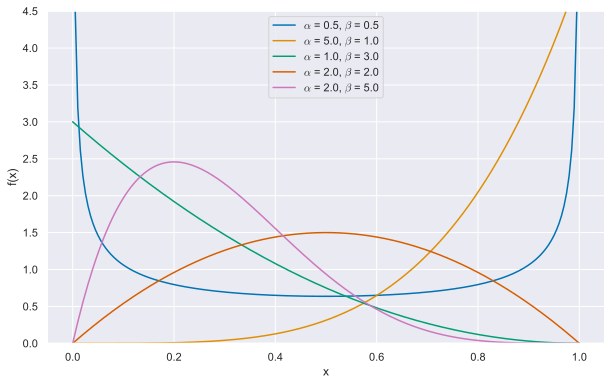

In [11]:
x = np.linspace(0, 1, 200)
alphas = [0.5, 5.0, 1.0, 2.0, 2.0]
betas = [0.5, 1.0, 3.0, 2.0, 5.0]
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)


La funzione `beta_mean_mode_variance()` ci restituisce la media, moda e varianza della distribuzione Beta.

In [46]:
def beta_mean_mode_variance(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2)
    variance = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return mean, mode, variance

Per esempio

In [47]:
alpha = 3
beta = 9
mean, mode, variance = beta_mean_mode_variance(alpha, beta)
print(f"Mean: {mean}, Mode: {mode}, Variance: {variance}")

Mean: 0.25, Mode: 0.2, Variance: 0.014423076923076924


```{warning} 
Attenzione alle parole: in questo contesto, il termine "beta" viene utilizzato con tre significati diversi:

-   la distribuzione di densità Beta,
-   la funzione matematica beta,
-   il parametro $\beta$.
```

## Distribuzione di Cauchy

La distribuzione di Cauchy è un caso speciale della distribuzione di $t$ di Student con 1 grado di libertà. È definita da una densità di probabilità che corrisponde alla seguente funzione, dipendente da due parametri $\alpha$ e $\beta$,

$$
f(x \mid \alpha, \beta) = \frac{1}{\pi \beta \left[1 + \left( \frac{x - \alpha}{\beta} \right)^2\right]}.
$$ (eq-cauchy-formula)

Il grafico mostra alcune distribuzioni di Cauchy con $\alpha$ = 0., 0., 0., -2.0 e $\beta$ = .5, 1., 2., 1.0.

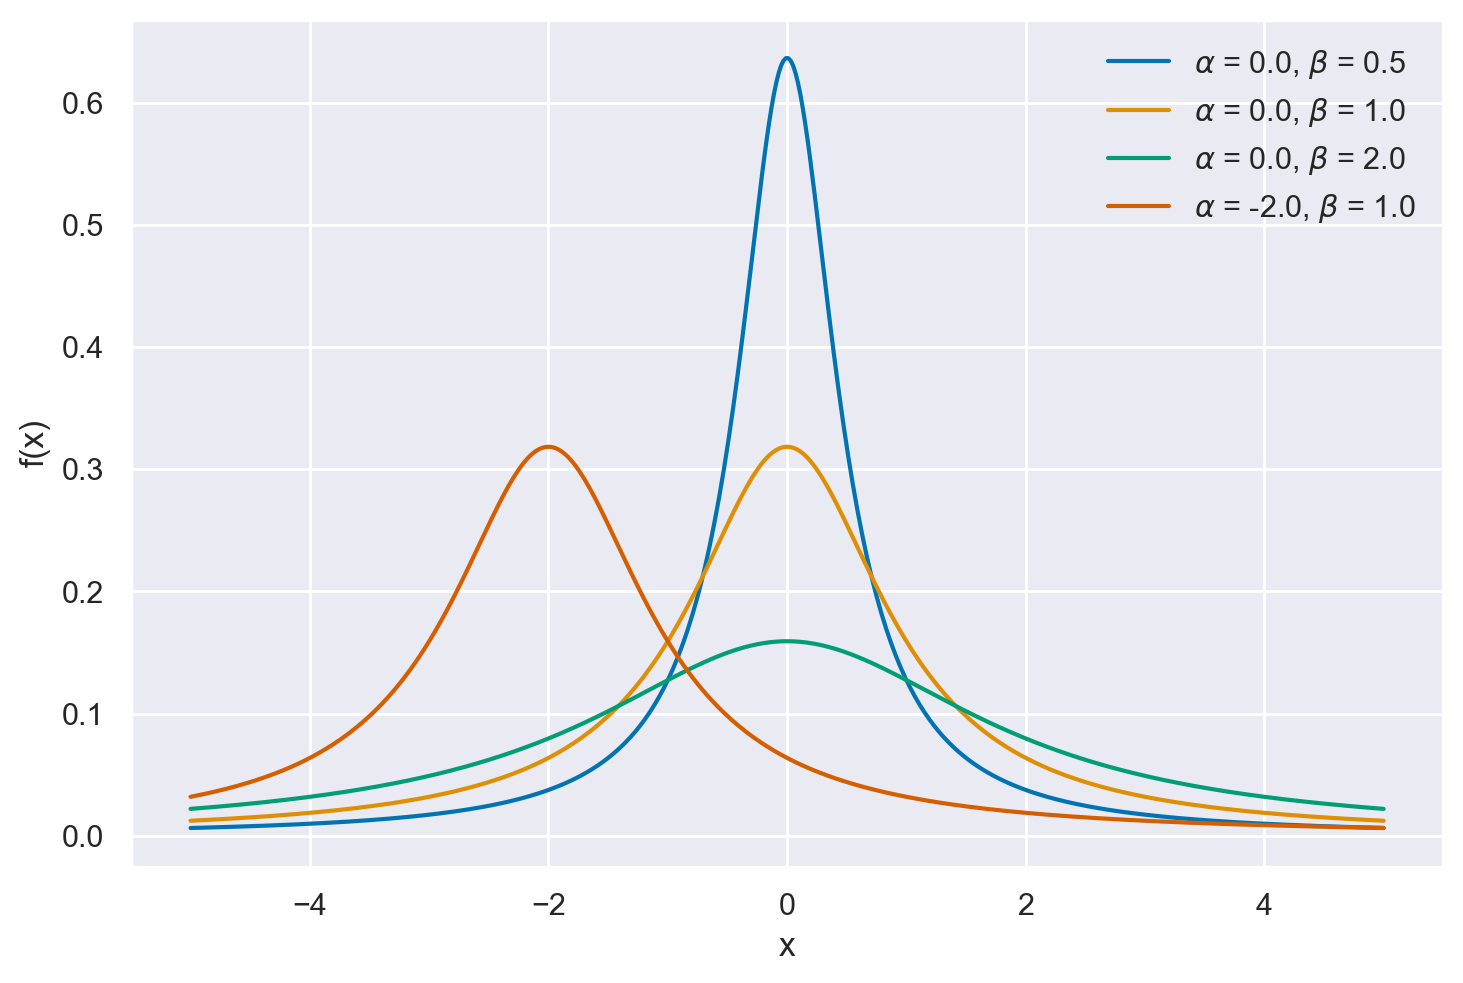

In [48]:
x = np.linspace(-5, 5, 500)
alphas = [0.0, 0.0, 0.0, -2.0]
betas = [0.5, 1.0, 2.0, 1.0]
for a, b in zip(alphas, betas):
    pdf = stats.cauchy.pdf(x, loc=a, scale=b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1)

## Distribuzione Gamma

La funzione di densità di probabilità gamma è una funzione matematica che descrive la distribuzione di probabilità di una variabile casuale continua. In modo intuitivo, possiamo pensare alla distribuzione gamma come un modello per descrivere il tempo di attesa per un certo numero di eventi rari, come ad esempio il tempo trascorso tra i momenti in cui le persone ricordano sogni vividi. 

Immaginiamo di condurre uno studio in cui chiediamo a diverse persone di tenere un diario dei loro sogni vividi e di registrare il tempo trascorso tra i sogni che ricordano. Alcune persone potrebbero ricordare sogni vividi frequentemente, mentre altre potrebbero ricordarne solo raramente. Utilizzando la distribuzione gamma, possiamo calcolare la probabilità che una persona debba aspettare un certo periodo di tempo prima di ricordare un altro sogno vivido.

Se il parametro di forma (shape) della distribuzione gamma è maggiore di 1, otteniamo una curva a campana che indica che le persone ricordano sogni vividi con una certa regolarità. Se, invece, il parametro di forma è minore di 1, otteniamo una curva più asimmetrica, suggerendo che i tempi di attesa tra i sogni vividi possono variare notevolmente tra le persone.

Un altro parametro è il "rate" (tasso), che rappresenta il reciproco della media del tempo di attesa. In altre parole, maggiore è il tasso, più breve sarà il tempo medio tra gli eventi.

La funzione di densità gamma ti permette di calcolare la probabilità di dover aspettare un certo periodo di tempo tra gli eventi, fornendo una comprensione dell'intervallo di attesa e delle probabilità associate a diverse durate di tempo.

La formula della funzione di densità di probabilità gamma è data da:

$$
f(x|\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} 
$$

dove:
- $x$ è la variabile casuale continua
- $\alpha$ è il parametro di forma (shape)
- $\beta$ è il parametro di tasso (rate)
- $\Gamma(\alpha)$ è la funzione gamma di $\alpha$.

Per esempio, qui è riportata la distribuzione Gamma con tempo di attesa medio di 5 giorni e parametro shape = 3.

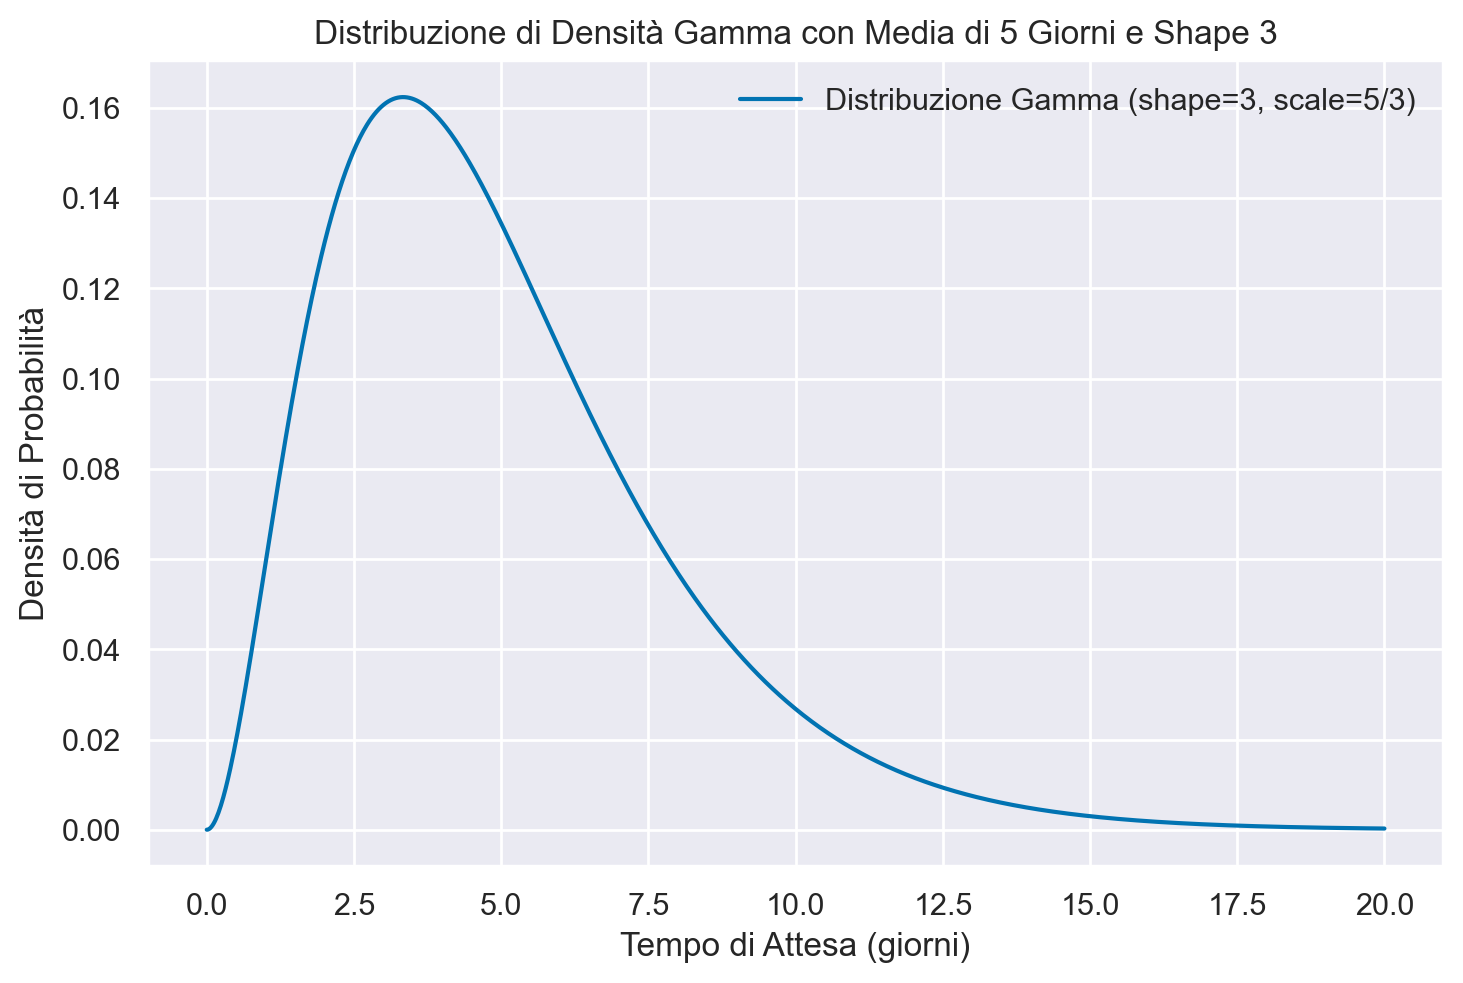

In [49]:
# Parametri della distribuzione gamma
shape = 3
mean = 5  # Media della distribuzione (5 giorni)

# Calcolo del parametro di scala in base alla media e shape
scale = mean / shape

# Crea un array di valori da 0 a 20 (tempo di attesa massimo considerato)
x = np.linspace(0, 20, 1000)

# Calcola la distribuzione gamma con i parametri specificati
gamma_dist = stats.gamma(a=shape, scale=scale)

# Calcola la funzione di densità di probabilità (PDF) della distribuzione gamma
pdf_values = gamma_dist.pdf(x)

# Plot del grafico
plt.plot(x, pdf_values, label='Distribuzione Gamma (shape=3, scale=5/3)')
plt.xlabel('Tempo di Attesa (giorni)')
plt.ylabel('Densità di Probabilità')
plt.title('Distribuzione di Densità Gamma con Media di 5 Giorni e Shape 3')
plt.legend()
plt.grid(True)
plt.show()

## Distribuzione log-normale

Sia $y$ una variabile casuale avente distribuzione normale con media $\mu$ e varianza $\sigma^2$. Definiamo poi una nuova variabile casuale $x$ attraverso la relazione

$$
x = e^y \quad \Longleftrightarrow \quad y = \log x.
$$ 

Il dominio di definizione della $x$ è il semiasse $x > 0$ e la densità di probabilità $f(x)$ è data da

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \frac{1}{x} \exp \left\{-\frac{(\log x -  \mu)^2}{2 \sigma^2} \right\}.
$$ (eq-lognormal-formula)

Questa funzione di densità è chiamata log-normale.

Il valore atteso e la varianza di una distribuzione log-normale sono dati dalle seguenti equazioni:

$$
\mathbb{E}(x) = \exp \left\{\mu + \frac{\sigma^2}{2} \right\}.
$$

$$
\mathbb{V}(x) = \exp \left\{2 \mu + \sigma^2 \right\} \left(\exp \left\{\sigma^2 \right\}  -1\right).
$$

Si può dimostrare che il prodotto di variabili casuali log-normali ed indipendenti segue una distribuzione log-normale.

La figura mostra tre distribuzioni log-normali con $\mu$ = 0.0 e $\sigma$ = .25, .5, 1.0.

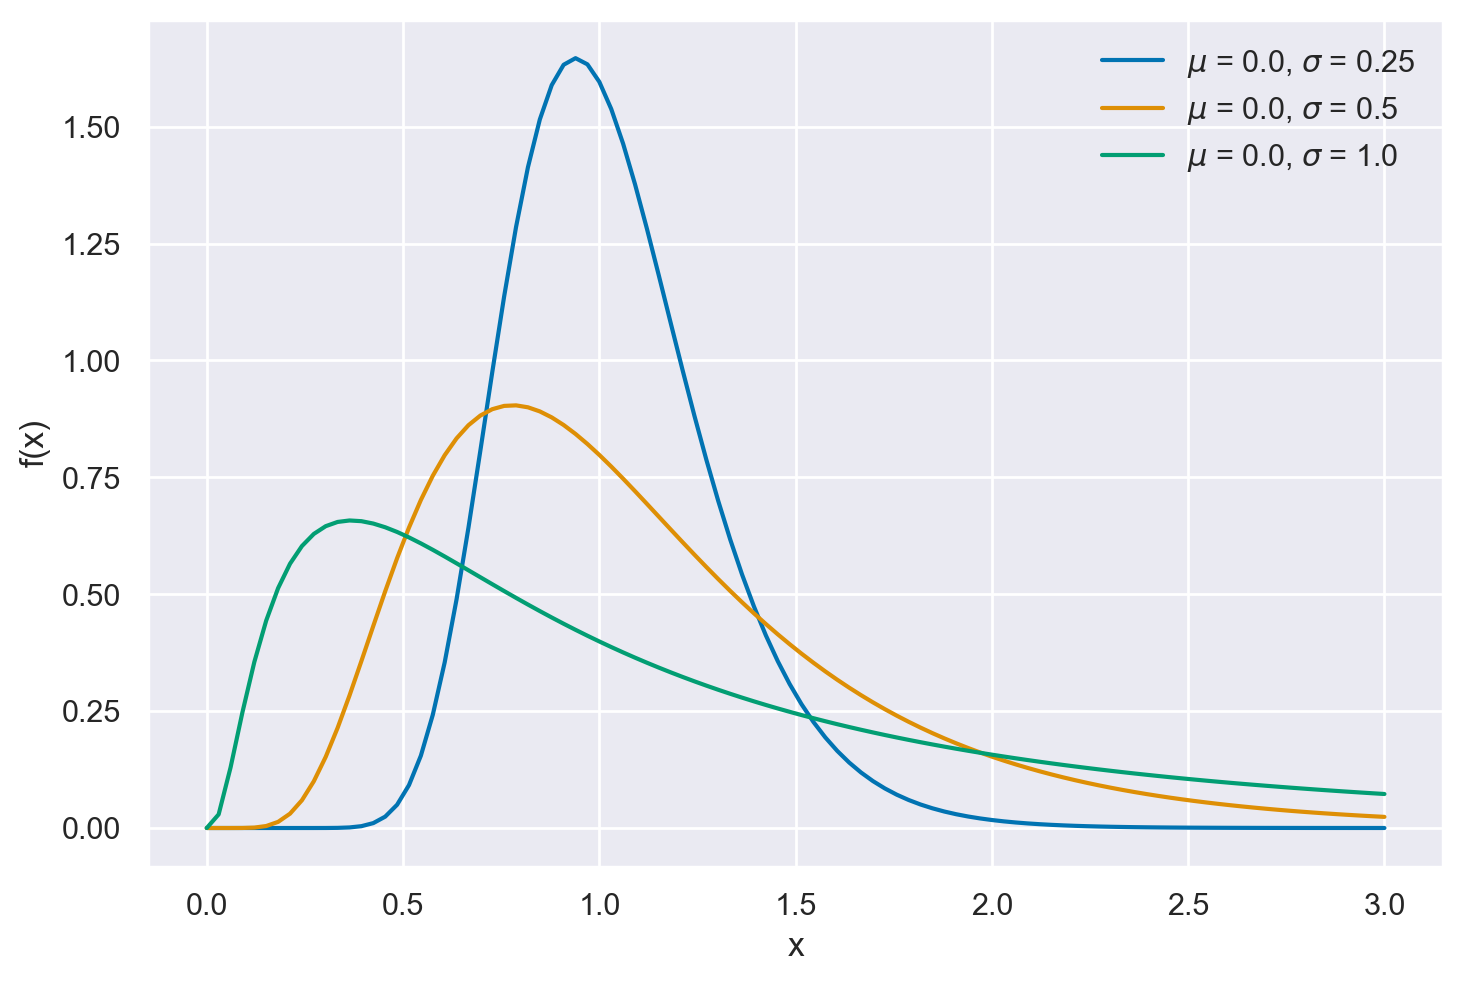

In [50]:
x = np.linspace(0, 3, 100)
mus = [0.0, 0.0, 0.0]
sigmas = [0.25, 0.5, 1.0]
for mu, sigma in zip(mus, sigmas):
    pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1)

## Commenti e considerazioni finali 

In questa dispensa le densità continue che useremo più spesso sono la distribuzione Normale e la distribuzione Beta. Faremo un uso limitato della distribuzione $t$ di Student, della distribuzione gamma e della distribuzione di Cauchy. Le altre distribuzioni qui descritte sono state presentate a puro titolo esemplificativo.

## Watermark

In [ ]:
%watermark -n -u -v -iv -w